# **A Data Science Project on Credit Default Risk Analysis**
##### Author:Mukesh Kumar Chaudhary
##### Email:cmukesh8688@gmail.com

### **Problem Statement**
Home Credit B.V. is an international non-bank financial institution founded in 1997 in the Czech Republic.The company operates in 14 countries and focuses on lending primarily to people with little or no credit history. As of 2016 the company has over 15 million active customers, with two-thirds of them in Asia and 7.3 million in China. 

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


### **Data**


- application_{train|test}.csv

 - This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
 - Static data for all applications. One row represents one loan in our data sample.
 
 
- bureau.csv
 - All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a      loan in our sample).
 - For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.
 
 
- bureau_balance.csv
 - Monthly balances of previous credits in Credit Bureau.
 - This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in      sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.
 

- POS_CASH_balance.csv
 - Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
 - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to    loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some        history observable for the previous credits) rows.
 
 
- credit_card_balance.csv
 - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
 - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to    loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some      history observable for the previous credit card) rows.
 
 
- previous_application.csv
 - All previous applications for Home Credit loans of clients who have loans in our sample.
 - There is one row for each previous application related to loans in our data sample.
 
 
- installments_payments.csv
 - Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
   There is a) one row for every payment that was made plus b) one row each for missed payment.
   One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit    credit related to loans in our sample.
   

- train_bureau.csv 
 - This dataframe is created manualy by group joining application_train,bureau and bureau_balance dataframe with aggregation funtion count,sum,max,min,mean .
 
 
- previous_loan_final.csv
 -  This dataframe is created manually by group joining previous_application,POS_CASH_balance,credi_card_balance and intallments_payments dataframe with aggregation funtion count,sum,max,min,mean .
 
 
- home_credit_final.csv
 - This dataframe is created manually by joining train_bureau.csv and previous_loan_final.csv. 
 
 
- automative_features_app.csv
 - This is created by auto generated library ***featuretools*** with aggregation premitives sum,max,min,mode,mean,count
 
 
![image](image/database_flowchart.png)


In [1]:
# import all necessary libraries
# for data mauplation
import pandas as pd 
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


# ignore warnig from pandas
import warnings
warnings.filterwarnings("ignore")


# for featuretools
import featuretools as ft

# import user libraries 
from text_format_class import TxtFormat 
import manage_missing_data as manage_df
import manage_dataframe as manage_agg_cat
import display_corr as manage_corr
import manage_model
import manage_pca
import plot_features
%load_ext autoreload
%autoreload 2



In [34]:
# import sklearn library for preprocessing ,modelling , Accuracy Analysis , Cross Validation , optimization 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from  sklearn.model_selection import train_test_split

# XGBoosting 

import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Gradient Boosting algorithm
import os
import lightgbm as lgb
sns.set_style("darkgrid")

### Retrieving Data and Data dimension

In [70]:
# upload all Data 
pd.options.display.max_columns = None
df_app_train = pd.read_csv("Data/application_train.csv")
df_app_test = pd.read_csv("Data/application_test.csv")
df_bureau = pd.read_csv("Data/bureau.csv")
df_bureau_balance = pd.read_csv("Data/bureau_balance.csv")
df_previous = pd.read_csv("Data/previous_application.csv")
df_credit = pd.read_csv("Data/credit_card_balance.csv")
df_cash = pd.read_csv("Data/POS_CASH_balance.csv")
df_payment = pd.read_csv("Data/installments_payments.csv")

In [5]:
# Dimension of Data 
print("Dimension of Data")
print("------------------")
print("Application Train    : ", df_app_train.shape )
print("Application Test     :",df_app_test.shape)
print("Bureau               :" ,df_bureau.shape)
print("Bureau Balance       :",df_bureau_balance.shape)
print("Previous application : ",df_previous.shape)
print("Credit card balance  :",df_credit.shape)
print("POSH_CASH_balance    :" ,df_cash.shape)
print("Instalments payment  :",df_payment.shape)


Dimension of Data
------------------
Application Train    :  (307511, 122)
Application Test     : (48744, 121)
Bureau               : (1716428, 17)
Bureau Balance       : (27299925, 3)
Previous application :  (1670214, 37)
Credit card balance  : (3840312, 23)
POSH_CASH_balance    : (10001358, 8)
Instalments payment  : (13605401, 8)


In [6]:
# application_train from Home credit
print(df_app_train.shape)
df_app_train.head()


(307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [7]:
# for test application
print(df_app_test.shape)
df_app_test.head()

(48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [8]:
# check columns names between application test and application train 
for col in df_app_train.columns:
    if col not in df_app_test.columns:
        print(col)

TARGET


In [9]:
#pd.options.display.max_columns = None
print(df_app_train.columns.values)

['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOOR

In [10]:
# credit history from another bureau
print(df_bureau.shape)
df_bureau.head()

(1716428, 17)


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [11]:
# features of bureau dataset
df_bureau.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'], dtype=object)

In [12]:
# bureau balance 
print(df_bureau_balance.shape)
df_bureau_balance.head()

(27299925, 3)


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [13]:
# features of bureau balance dataset
df_bureau_balance.columns.values

array(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype=object)

In [14]:
# previous applicattion 
print(df_previous.shape)
df_previous.head()


(1670214, 37)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [15]:
# features of previous application 
df_previous.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [16]:
#Credit card balance dataset
print(df_credit.shape)
df_credit.head()

(3840312, 23)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [17]:
# features of credit card balance dataset
df_credit.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

In [18]:
# POSH_CASH balance dataset 
print(df_cash.shape)
df_cash.head()

(10001358, 8)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [19]:
# features of POSH_CASH balance dataset
df_cash.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'], dtype=object)

In [20]:
# instalments payments dataset 
print(df_payment.shape)
df_payment.head()

(13605401, 8)


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [21]:
# features of instalments_payments 
df_payment.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], dtype=object)

### Checking missing values

In [22]:
# application train
manage_df.missing_data_display(df_app_train)

Total    Percent
COMMONAREA_MEDI              214865  69.872297
COMMONAREA_AVG               214865  69.872297
COMMONAREA_MODE              214865  69.872297
NONLIVINGAPARTMENTS_MODE     213514  69.432963
NONLIVINGAPARTMENTS_MEDI     213514  69.432963
...                             ...        ...
REG_CITY_NOT_LIVE_CITY            0   0.000000
LIVE_REGION_NOT_WORK_REGION       0   0.000000
REG_REGION_NOT_WORK_REGION        0   0.000000
HOUR_APPR_PROCESS_START           0   0.000000
SK_ID_CURR                        0   0.000000

[122 rows x 2 columns]

In [23]:
# delete missing value more than 40% 
manage_df.delete_missing_values(df_app_train)
manage_df.handle_missing_value(df_app_train)
manage_df.missing_data_display(df_app_train)

Total  Percent
AMT_REQ_CREDIT_BUREAU_YEAR       0      0.0
LIVE_REGION_NOT_WORK_REGION      0      0.0
DAYS_REGISTRATION                0      0.0
DAYS_ID_PUBLISH                  0      0.0
FLAG_MOBIL                       0      0.0
...                            ...      ...
FLAG_DOCUMENT_3                  0      0.0
FLAG_DOCUMENT_4                  0      0.0
FLAG_DOCUMENT_5                  0      0.0
FLAG_DOCUMENT_6                  0      0.0
SK_ID_CURR                       0      0.0

[73 rows x 2 columns]

In [24]:
#application test 
manage_df.delete_missing_values(df_app_test)
manage_df.handle_missing_value(df_app_test)
manage_df.missing_data_display(df_app_test)

Total  Percent
AMT_REQ_CREDIT_BUREAU_YEAR      0      0.0
AMT_REQ_CREDIT_BUREAU_QRT       0      0.0
DAYS_ID_PUBLISH                 0      0.0
FLAG_MOBIL                      0      0.0
FLAG_EMP_PHONE                  0      0.0
...                           ...      ...
FLAG_DOCUMENT_4                 0      0.0
FLAG_DOCUMENT_5                 0      0.0
FLAG_DOCUMENT_6                 0      0.0
FLAG_DOCUMENT_7                 0      0.0
SK_ID_CURR                      0      0.0

[72 rows x 2 columns]

In [25]:
#Bureau dataset
manage_df.delete_missing_values(df_bureau)
manage_df.handle_missing_value(df_bureau)
manage_df.missing_data_display(df_bureau)

Total  Percent
DAYS_CREDIT_UPDATE          0      0.0
CREDIT_TYPE                 0      0.0
AMT_CREDIT_SUM_OVERDUE      0      0.0
AMT_CREDIT_SUM_LIMIT        0      0.0
AMT_CREDIT_SUM_DEBT         0      0.0
AMT_CREDIT_SUM              0      0.0
CNT_CREDIT_PROLONG          0      0.0
DAYS_ENDDATE_FACT           0      0.0
DAYS_CREDIT_ENDDATE         0      0.0
CREDIT_DAY_OVERDUE          0      0.0
DAYS_CREDIT                 0      0.0
CREDIT_CURRENCY             0      0.0
CREDIT_ACTIVE               0      0.0
SK_ID_BUREAU                0      0.0
SK_ID_CURR                  0      0.0

In [26]:
#bureu balance dataset 
manage_df.delete_missing_values(df_bureau_balance)
manage_df.handle_missing_value(df_bureau_balance)
manage_df.missing_data_display(df_bureau_balance)
print(df_bureau_balance.shape)

(27299925, 3)


In [27]:
#previous application dataset
print(df_previous.shape)
manage_df.delete_missing_values(df_previous)
manage_df.handle_missing_value(df_previous)
print(df_previous.shape)
manage_df.missing_data_display(df_previous)


(1670214, 37)
(1670214, 26)


Total  Percent
PRODUCT_COMBINATION              0      0.0
NAME_YIELD_GROUP                 0      0.0
SK_ID_CURR                       0      0.0
NAME_CONTRACT_TYPE               0      0.0
AMT_ANNUITY                      0      0.0
AMT_APPLICATION                  0      0.0
AMT_CREDIT                       0      0.0
AMT_GOODS_PRICE                  0      0.0
WEEKDAY_APPR_PROCESS_START       0      0.0
HOUR_APPR_PROCESS_START          0      0.0
FLAG_LAST_APPL_PER_CONTRACT      0      0.0
NFLAG_LAST_APPL_IN_DAY           0      0.0
NAME_CASH_LOAN_PURPOSE           0      0.0
NAME_CONTRACT_STATUS             0      0.0
DAYS_DECISION                    0      0.0
NAME_PAYMENT_TYPE                0      0.0
CODE_REJECT_REASON               0      0.0
NAME_CLIENT_TYPE                 0      0.0
NAME_GOODS_CATEGORY              0      0.0
NAME_PORTFOLIO                   0      0.0
NAME_PRODUCT_TYPE                0      0.0
CHANNEL_TYPE                     0      0.0
SELLERPLACE_AREA                 0      0.0
NAME_SELLER_INDUSTRY             0      0.0
CNT_PAYMENT                      0      0.0
SK_ID_PREV                       0      0.0

In [28]:
#POSh_CASH dataset 
print(df_cash.shape)
manage_df.delete_missing_values(df_cash)
manage_df.handle_missing_value(df_cash)
print(df_cash.shape)
manage_df.missing_data_display(df_cash)

(10001358, 8)
(10001358, 8)


Total  Percent
SK_DPD_DEF                 0      0.0
SK_DPD                     0      0.0
NAME_CONTRACT_STATUS       0      0.0
CNT_INSTALMENT_FUTURE      0      0.0
CNT_INSTALMENT             0      0.0
MONTHS_BALANCE             0      0.0
SK_ID_CURR                 0      0.0
SK_ID_PREV                 0      0.0

In [29]:
#credit balance dataset 
print(df_credit.shape)
manage_df.delete_missing_values(df_credit)
manage_df.handle_missing_value(df_credit)
print(df_credit.shape)
manage_df.missing_data_display(df_credit)

(3840312, 23)
(3840312, 23)


Total  Percent
SK_DPD_DEF                      0      0.0
AMT_PAYMENT_CURRENT             0      0.0
SK_ID_CURR                      0      0.0
MONTHS_BALANCE                  0      0.0
AMT_BALANCE                     0      0.0
AMT_CREDIT_LIMIT_ACTUAL         0      0.0
AMT_DRAWINGS_ATM_CURRENT        0      0.0
AMT_DRAWINGS_CURRENT            0      0.0
AMT_DRAWINGS_OTHER_CURRENT      0      0.0
AMT_DRAWINGS_POS_CURRENT        0      0.0
AMT_INST_MIN_REGULARITY         0      0.0
AMT_PAYMENT_TOTAL_CURRENT       0      0.0
SK_DPD                          0      0.0
AMT_RECEIVABLE_PRINCIPAL        0      0.0
AMT_RECIVABLE                   0      0.0
AMT_TOTAL_RECEIVABLE            0      0.0
CNT_DRAWINGS_ATM_CURRENT        0      0.0
CNT_DRAWINGS_CURRENT            0      0.0
CNT_DRAWINGS_OTHER_CURRENT      0      0.0
CNT_DRAWINGS_POS_CURRENT        0      0.0
CNT_INSTALMENT_MATURE_CUM       0      0.0
NAME_CONTRACT_STATUS            0      0.0
SK_ID_PREV                      0      0.0

In [30]:
#payment balance dataset 
print(df_payment.shape)
manage_df.delete_missing_values(df_payment)
manage_df.handle_missing_value(df_payment)
print(df_payment.shape)
manage_df.missing_data_display(df_payment)

(13605401, 8)
(13605401, 8)


Total  Percent
AMT_PAYMENT                 0      0.0
AMT_INSTALMENT              0      0.0
DAYS_ENTRY_PAYMENT          0      0.0
DAYS_INSTALMENT             0      0.0
NUM_INSTALMENT_NUMBER       0      0.0
NUM_INSTALMENT_VERSION      0      0.0
SK_ID_CURR                  0      0.0
SK_ID_PREV                  0      0.0

In [31]:
df_app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

## Data Exploration

#### Application train and test data 

In [33]:
# About Application train dataframe

print(df_app_train.shape)
df_app_train.head()

(307511, 73)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [34]:
# features of df_application_train 
df_app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

Status of Target
------------------
total_no_applicant :  307511  
total loan was repaid:  282686  and Percent :   92.0 %   
total loan was not repaid:  24825  and Percent :  8.0 %   


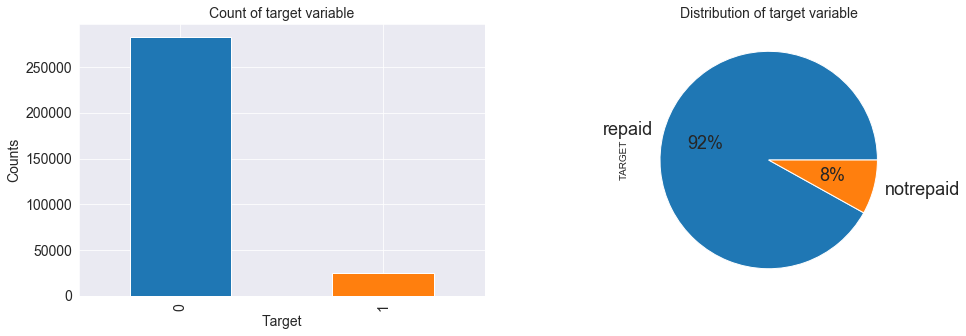

In [41]:
# calculating percentage of not repaid loan and ploting 

total_no_applicant = df_app_train['TARGET'].count()

total_repaid = df_app_train[df_app_train['TARGET']==0]['TARGET'].count()

total_not_repaid = df_app_train[df_app_train['TARGET']==1]['TARGET'].count()



start = "\033[1m"
end = "\033[0;0m"

print("Status of Target")
print("------------------")
print(f"total_no_applicant : {TxtFormat().BOLD} {total_no_applicant} {TxtFormat().END} ")
print(f"""total loan was repaid: {TxtFormat().BOLD} {total_repaid} {TxtFormat().END} and Percent :  {TxtFormat().BOLD} {round(total_repaid/total_no_applicant *100)} %  {TxtFormat().END} """)
print(f"total loan was not repaid: {TxtFormat().BOLD} {total_not_repaid} {TxtFormat().END} and Percent : {TxtFormat().BOLD} {round(total_not_repaid/total_no_applicant *100)} %  {TxtFormat().END} ")


# plot graph

fig , ax = plt.subplots(nrows=1,ncols=2,figsize=(16,5))
df_app_train['TARGET'].value_counts().plot(kind='bar' ,colors = sns.color_palette(), ax =ax[0], fontsize = 14 , label = '0: Repaid \n 1: Notrepaid')
ax[0].set_title("Count of target variable",fontsize = 14)
ax[0].set_ylabel("Counts", fontsize = 14)
ax[0].set_xlabel("Target",fontsize = 14)

df_app_train['TARGET'].value_counts().plot.pie(autopct = "%1.0f%%", colors = sns.color_palette(), labels = ['repaid','notrepaid'],fontsize =18 ,ax =ax[1])
ax[1].set_title("Distribution of target variable",fontsize = 14)

fig.savefig(" Target Level.png")

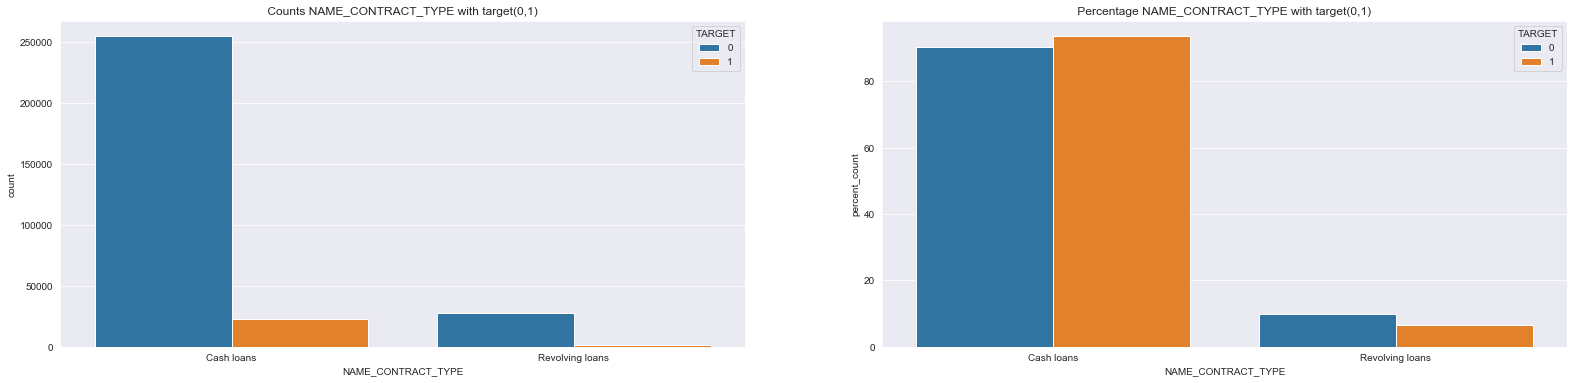

In [43]:
# status of NAME_CONTRACT_TYPE with target
plot_features.display_targetfeature(df_app_train,'TARGET','NAME_CONTRACT_TYPE','SK_ID_CURR',horizantal= False)


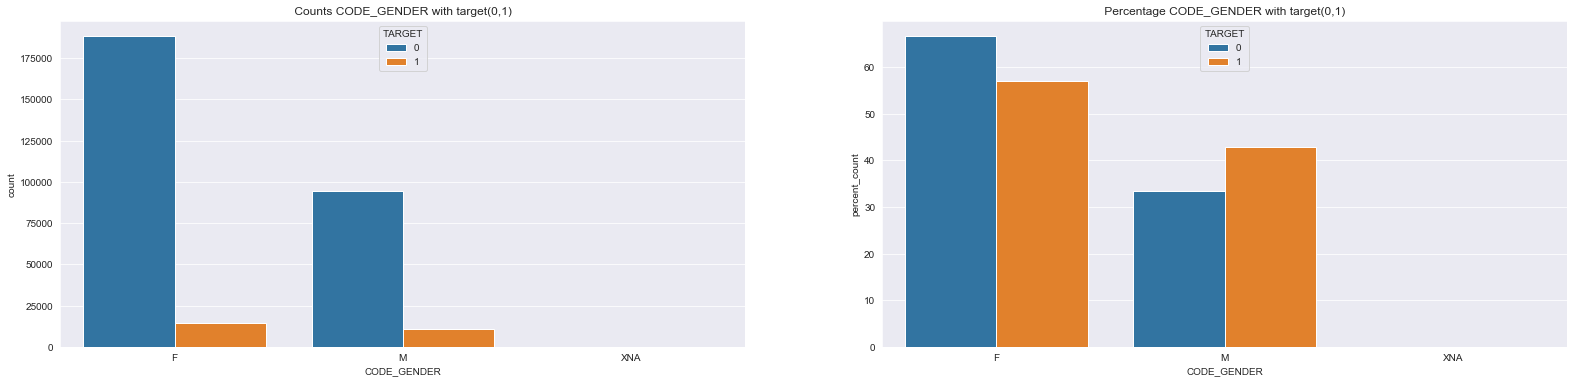

In [37]:
# Gender with respect to target
plot_features.display_targetfeature(df_app_train,'TARGET','CODE_GENDER','SK_ID_CURR',horizantal= False)

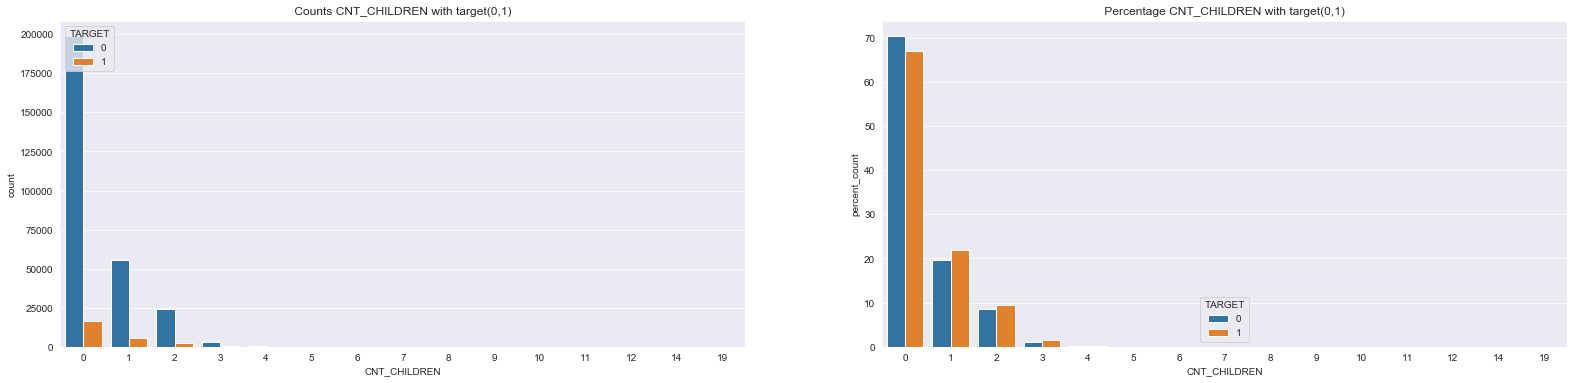

No handles with labels found to put in legend.


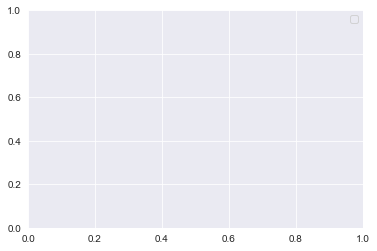

In [87]:
# status CNT_CHILDREN
plot_features.display_targetfeature(df_app_train,'TARGET','CNT_CHILDREN','SK_ID_CURR',horizantal= False)
plt.legend(loc='best')


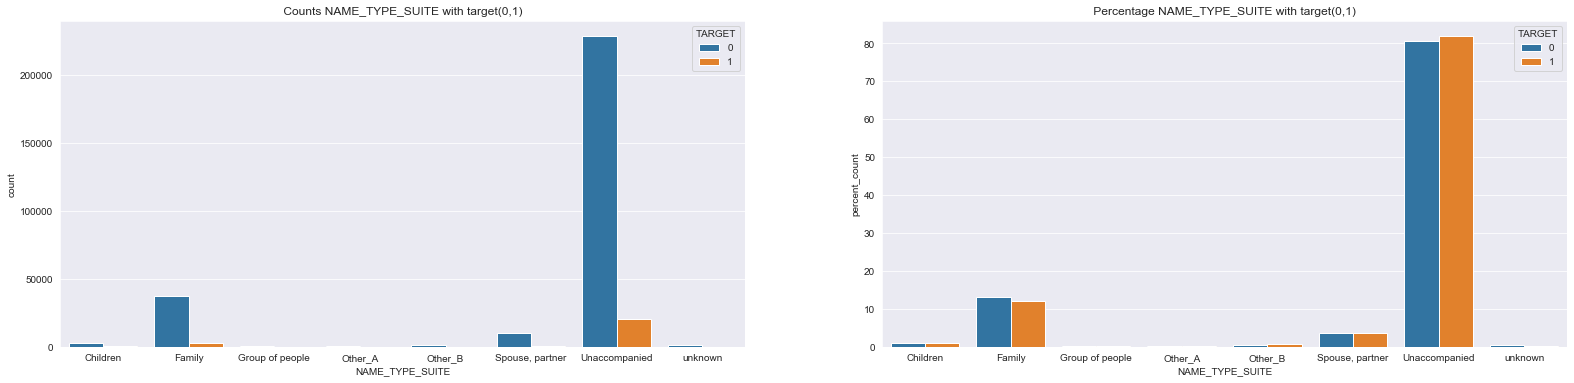

In [38]:
# NAME_TYPE_SUITE

plot_features.display_targetfeature(df_app_train,'TARGET','NAME_TYPE_SUITE','SK_ID_CURR',horizantal=False)

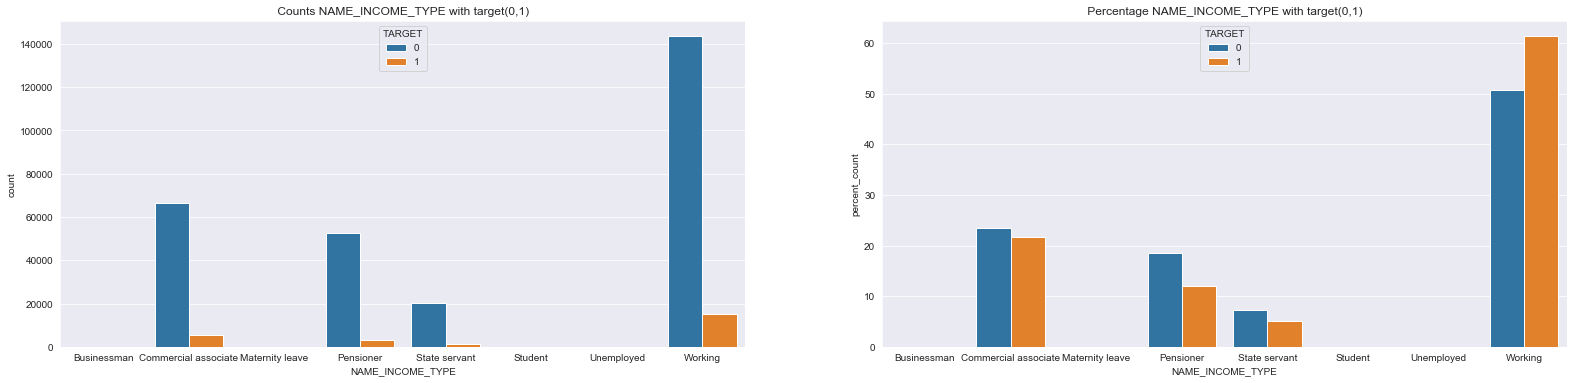

In [39]:
# NAME_INCOME_TYPE  feature plot with target 

plot_features.display_targetfeature(df_app_train,'TARGET','NAME_INCOME_TYPE','SK_ID_CURR',horizantal=False)


It seems working income type percetage on both target (0 , 1) has high 

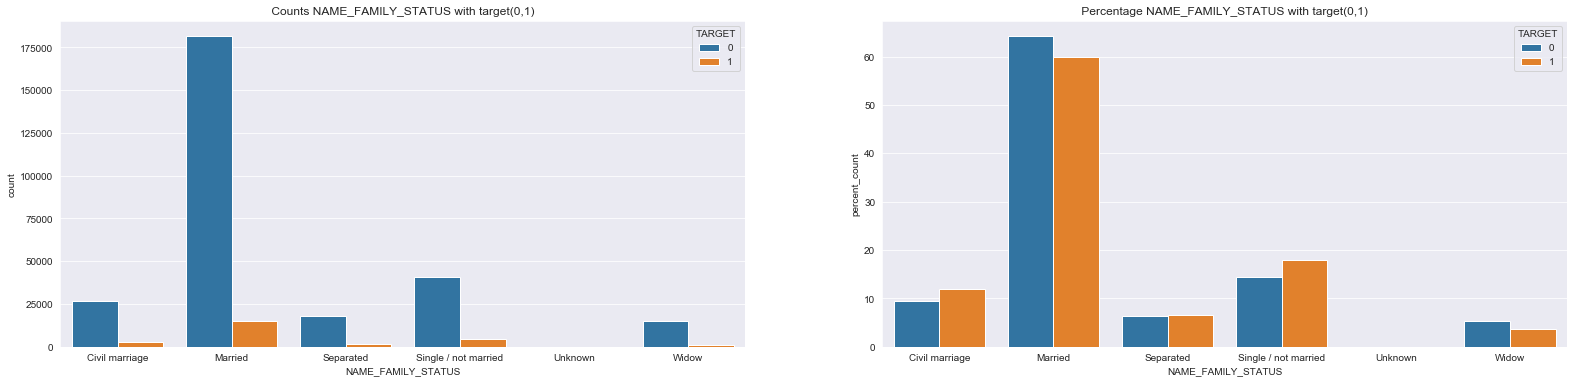

In [40]:
# family status
plot_features.display_targetfeature(df_app_train,'TARGET','NAME_FAMILY_STATUS','SK_ID_CURR')

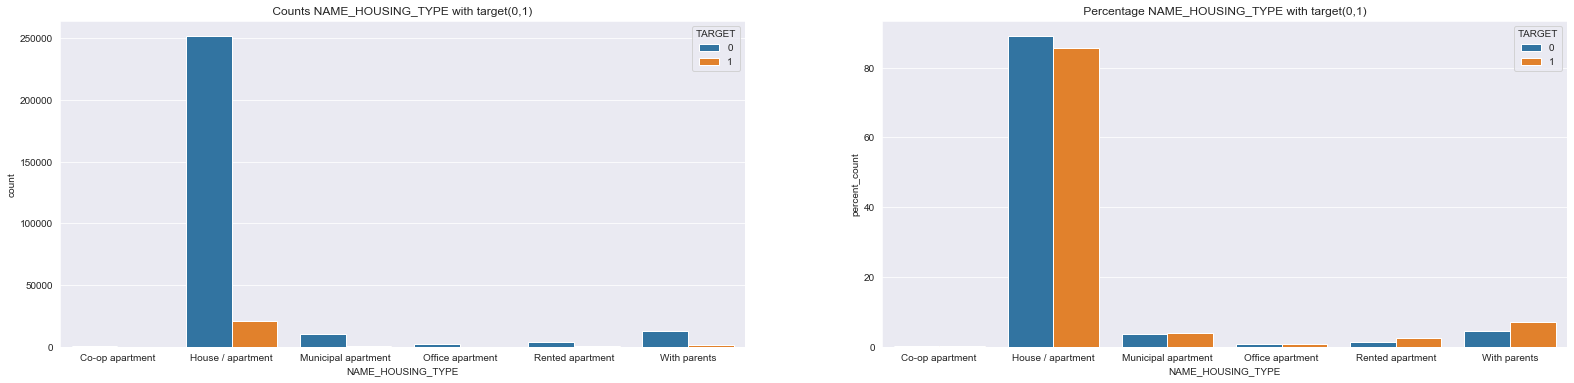

In [41]:
# status of NAME_HOUSING_TYPE
plot_features.display_targetfeature(df_app_train,'TARGET','NAME_HOUSING_TYPE','SK_ID_CURR')


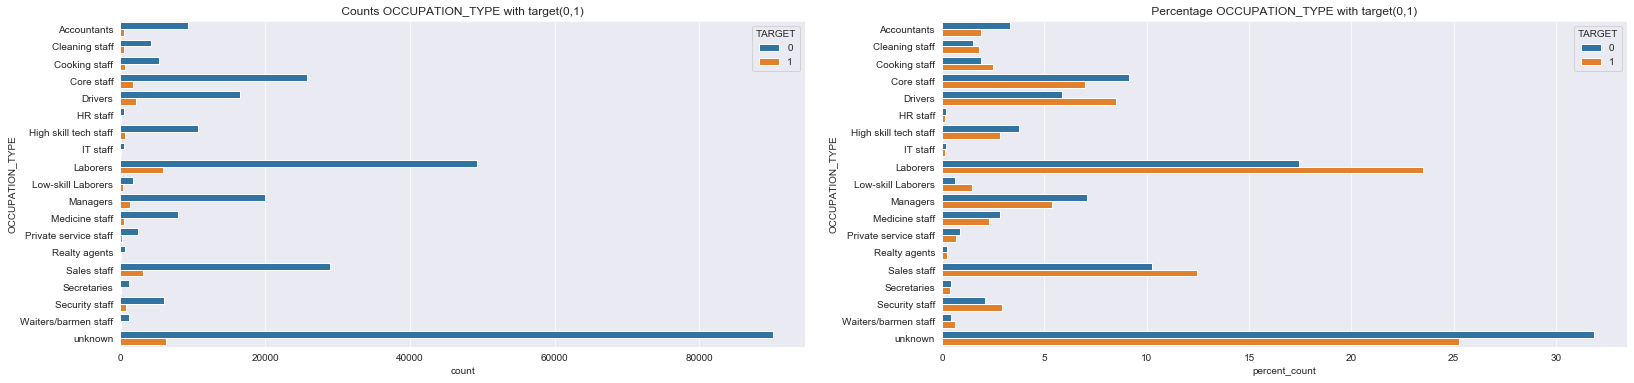

In [42]:
# status of OCCUPATION_TYPE

plot_features.display_targetfeature(df_app_train,'TARGET','OCCUPATION_TYPE','SK_ID_CURR',horizantal=True)

In [43]:
df_app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

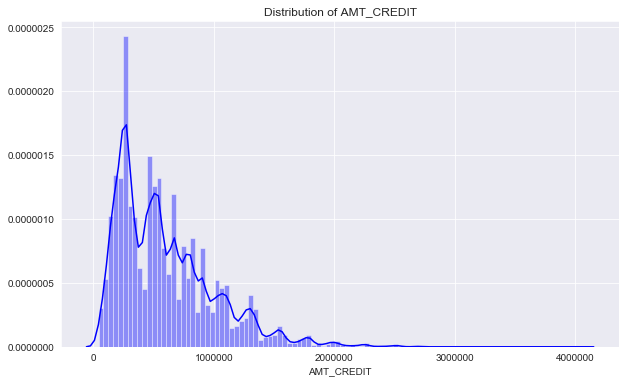

In [44]:
# distribution of Amount of Credit
plot_features.plot_distribution_feature(df_app_train,'AMT_CREDIT','blue')

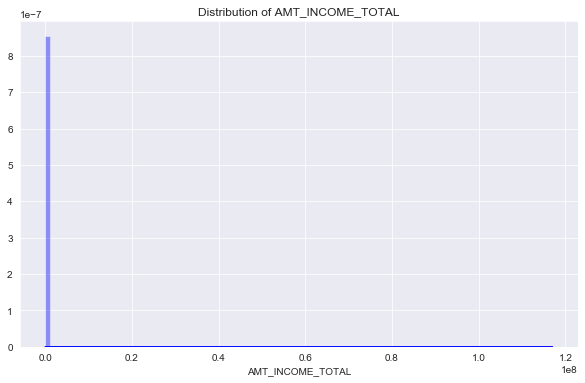

In [45]:
plot_features.plot_distribution_feature(df_app_train,'AMT_INCOME_TOTAL','blue')

In [ ]:
#check outlier 

#df_app_train['AMT_INCOME_TOTAL'].boxplot()

from scipy import stats

df_app_train[(np.abs(stats.zscore(df_app_train)) < 3).all(axis=1)]

#np.abs(stats.zscore(df_app_train['AMT_INCOME_TOTAL']) < 3).all()

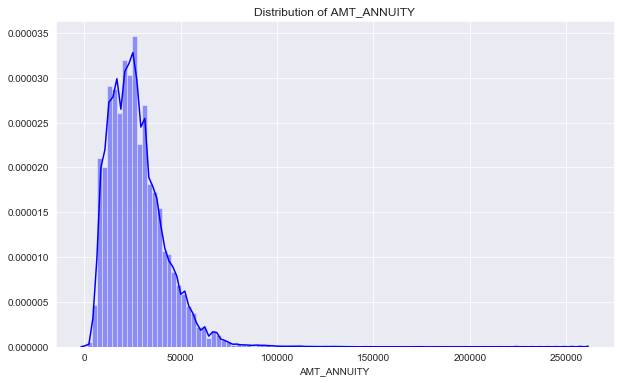

In [46]:
# AMT_ANNUITY
plot_features.plot_distribution_feature(df_app_train,'AMT_ANNUITY','blue')

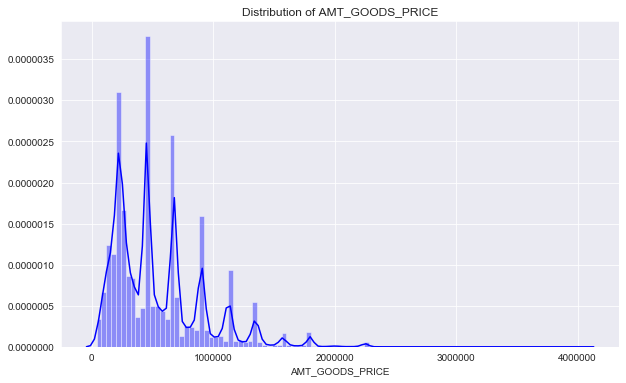

In [47]:
#   AMT_GOODS_PRICE

plot_features.plot_distribution_feature(df_app_train,'AMT_GOODS_PRICE','blue')

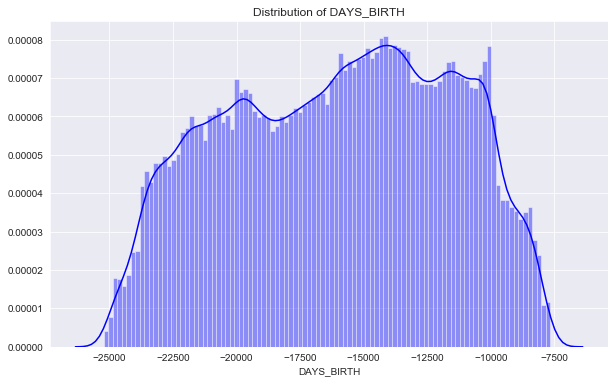

In [48]:
plot_features.plot_distribution_feature(df_app_train,'DAYS_BIRTH','blue')

 The negative value means that date pf birth is in past . The age range 
 is between approximative 20 to 68   

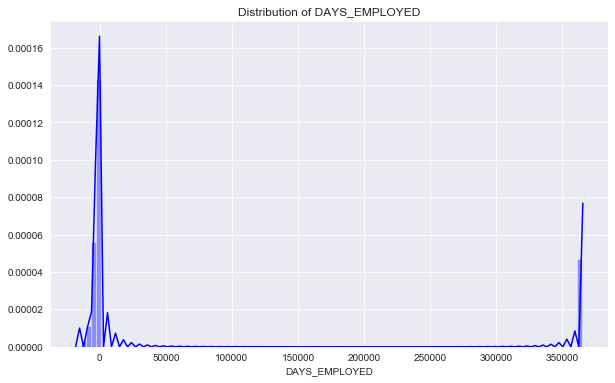

In [49]:
# Day employed distribution 
plot_features.plot_distribution_feature(df_app_train,'DAYS_EMPLOYED','blue')

The negetive value means unemployed but it's not clear. Most of people employed more than 100 years

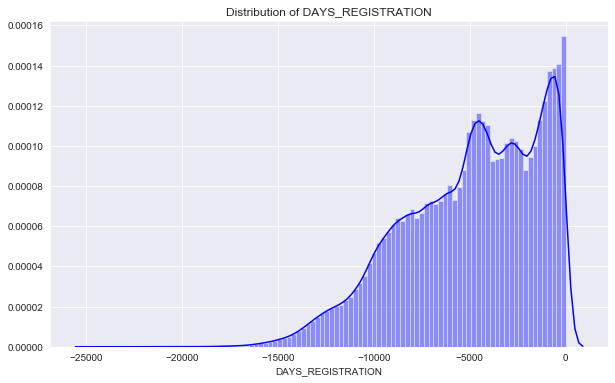

In [50]:
# Days of registration distribution
plot_features.plot_distribution_feature(df_app_train,'DAYS_REGISTRATION','blue')

The correlation between EXT_SOURCE_3 and the TARGET is -0.1559
Median value for loan that was not repaid = 0.4758
Median value for loan that was repaid = 0.5353


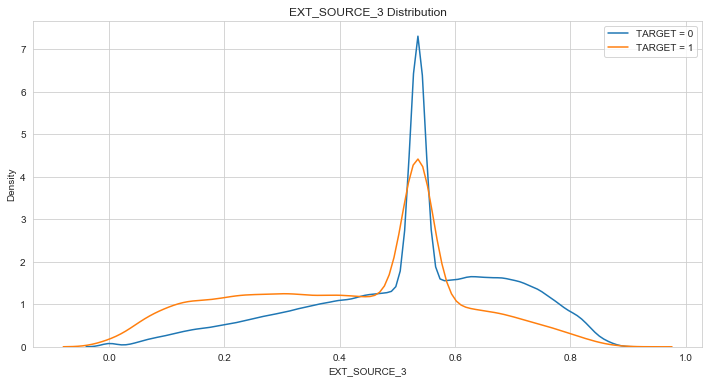

In [366]:
# kde plot EXT_SOURCE_3

manage_corr.Kde_target('EXT_SOURCE_3',df_app_train)

In [50]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']

for v in var:
    a = str(v).split()
    print(a)
    
a = 'Mukesh'

print(a.split())    

['AMT_ANNUITY']
['AMT_GOODS_PRICE']
['DAYS_EMPLOYED']
['DAYS_REGISTRATION']
['DAYS_BIRTH']
['DAYS_ID_PUBLISH']


ValueError: empty separator

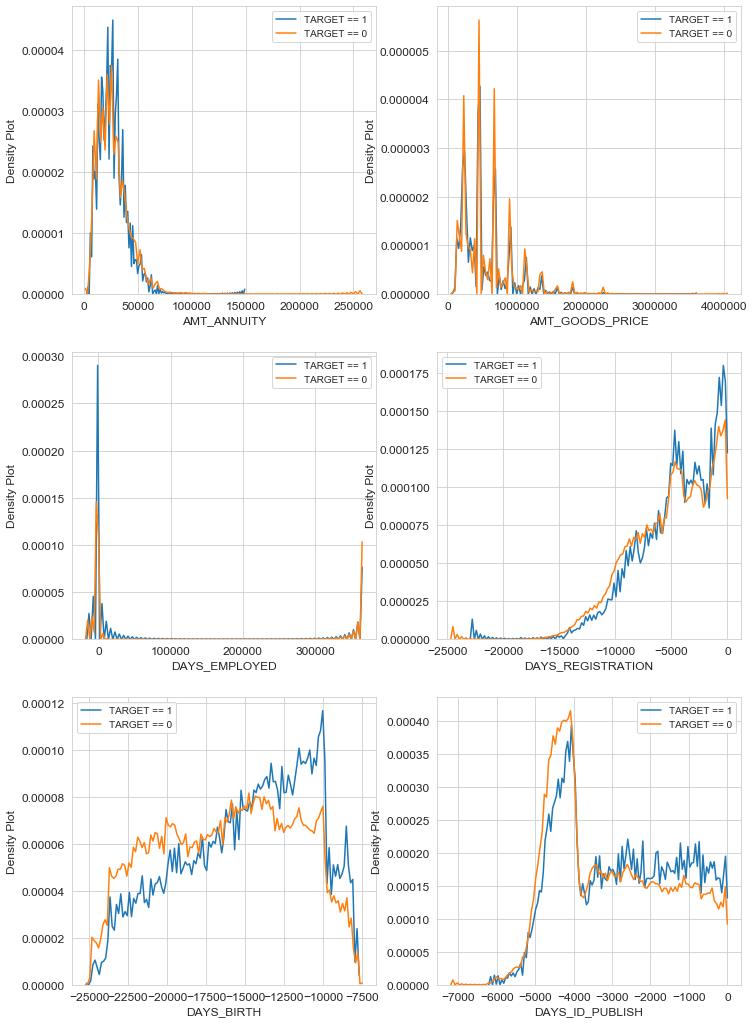

In [51]:
#compare with target = 1 and target = 0 with 
# var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']


var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_features.plot_distribution_comp(df_app_train,var,3)

In [367]:
# check top 10 features correlation with target

manage_corr.target_corrs(df_app_train)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

### EDA when join application train and previous loan

In [52]:
# join df_app_train and df_previous 

df_train_previous_eda = df_app_train.merge(df_previous,on='SK_ID_CURR',how ='left')
print(df_train_previous_eda.shape)
df_train_previous_eda.head()

(1430155, 98)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.003541      -16765          -1188            -1186.0   
3                    0.003541      -16765          -1188            -1186.0   
4                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2             -291           1               1                0   
3             -291           1               1                0   
4            -2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

In [357]:
# features of joining application and previous application loan
df_train_previous_eda.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE

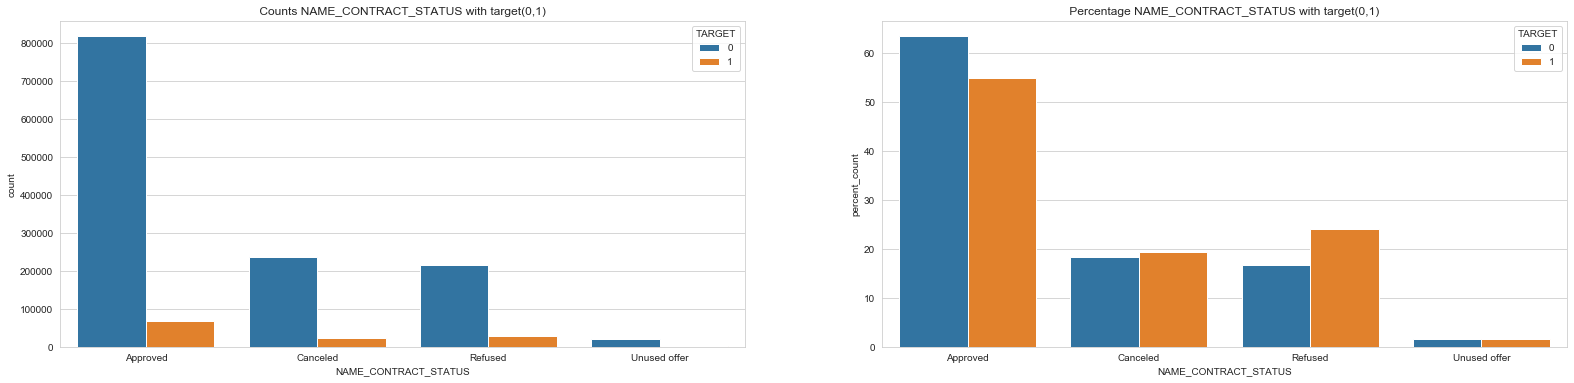

In [53]:
# status of 'NAME_CONTRACT_STATUS' of previous loan

plot_features.display_targetfeature(df_train_previous_eda,'TARGET','NAME_CONTRACT_STATUS','SK_ID_CURR')

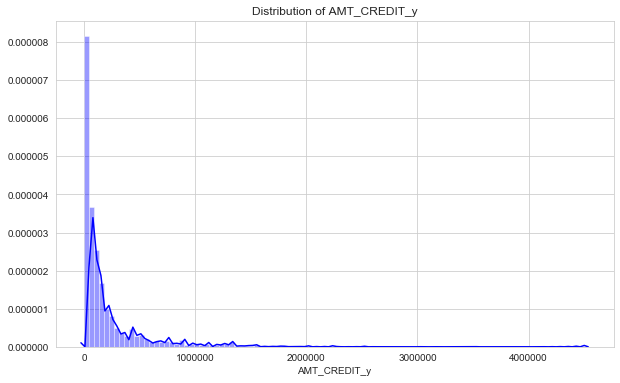

In [55]:
# 'AMT_CREDIT_y' of previous loan

plot_features.plot_distribution_onefeature(df_train_previous_eda,'AMT_CREDIT_y',color = 'blue')

The correlation between AMT_CREDIT_y and the TARGET is -0.0024
Median value for loan that was not repaid = 74700.0000
Median value for loan that was repaid = 80968.5000


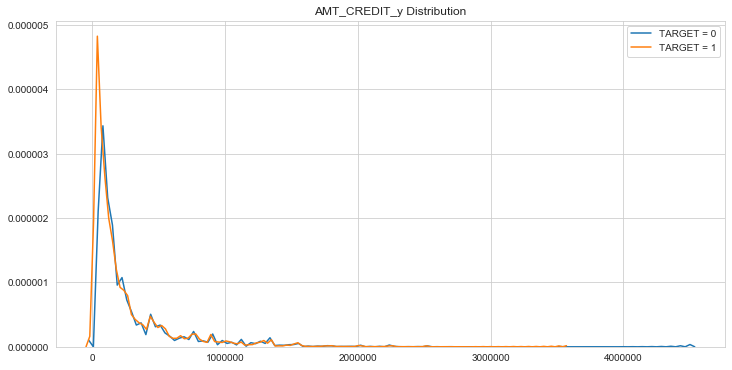

In [363]:
# kde plot AMT_CREDIT_y

manage_corr.Kde_target('AMT_CREDIT_y',df_train_previous_eda)

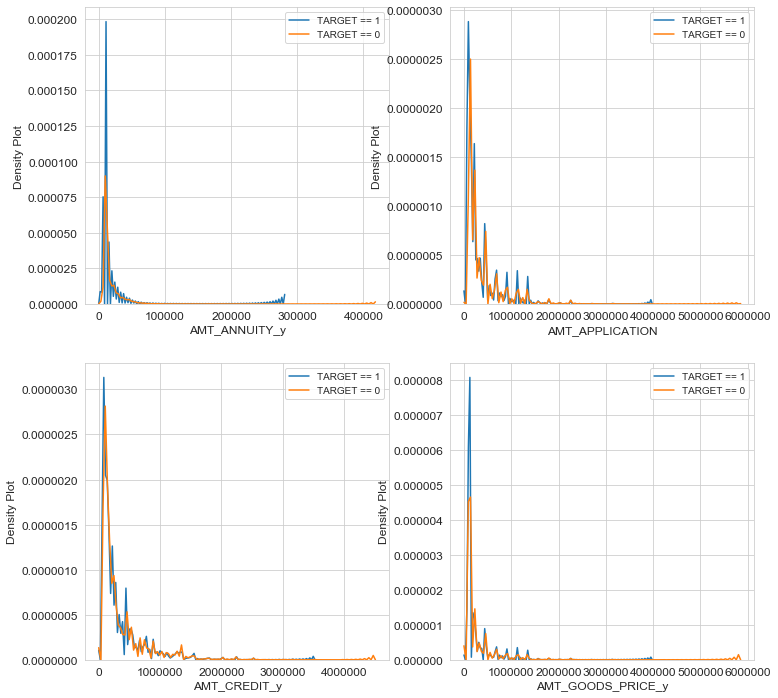

In [56]:
# compare of previous loan 'AMT_ANNUITY_y', 'AMT_APPLICATION' ,'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y'

features = ['AMT_ANNUITY_y', 'AMT_APPLICATION','AMT_CREDIT_y', 'AMT_GOODS_PRICE_y']

plot_features.plot_distribution_comp(df_train_previous_eda,features,n_row=2)

### Bureau data Exploration 

In [71]:
# dimension and info
df_bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

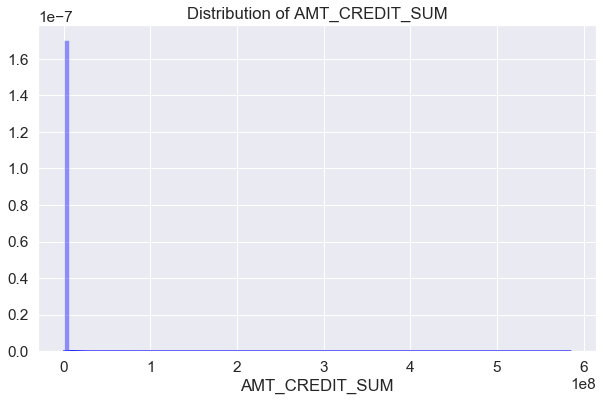

In [72]:
# Credit amount distribution 

plot_features.plot_distribution_onefeature(df_bureau,'AMT_CREDIT_SUM','blue')

### Part 1
previou_loan_final.csv is created by aggregation joining  previous application , POS_CASH_Balance , Intallment payment  and credit_balance .This dataframe has information of previous loan with transactions of cash and credit.

In [25]:
# previous loan application information which has credit amount , status , type of loan 
df_previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

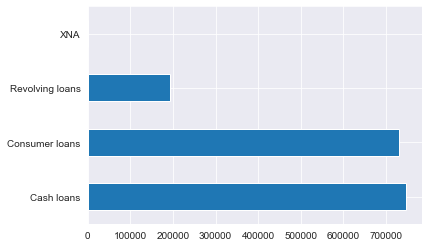

In [43]:
df_previous['NAME_CONTRACT_TYPE'].value_counts().plot(kind='barh')

In [45]:
df_previous[df_previous['NAME_CONTRACT_TYPE']=='Revolving loans']

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE   AMT_ANNUITY  \
17          1285768      142748    Revolving loans   9000.000000   
34          1629736      255331    Revolving loans  10125.000000   
45          2621158      281470    Revolving loans  14625.000000   
49          1371540      200721    Revolving loans  11250.000000   
50          2261993      299391    Revolving loans  15955.120659   
...             ...         ...                ...           ...   
1669960     1731392      180860    Revolving loans  11250.000000   
1669962     2017672      268190    Revolving loans  22500.000000   
1670191     1755809      122569    Revolving loans   2250.000000   
1670192     2101747      339383    Revolving loans   3375.000000   
1670193     1120445      179433    Revolving loans  15955.120659   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
17              180000.0    180000.0    180000.000000   
34              202500.0    202500.0    202500.000000   
45              292500.0    292500.0    292500.000000   
49              225000.0    225000.0    225000.000000   
50                   0.0         0.0    227847.279283   
...                  ...         ...              ...   
1669960              0.0    225000.0    227847.279283   
1669962              0.0    450000.0    227847.279283   
1670191          45000.0     45000.0     45000.000000   
1670192              0.0     67500.0    227847.279283   
1670193              0.0         0.0    227847.279283   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
17                          FRIDAY                       13   
34                        SATURDAY                       14   
45                          FRIDAY                       17   
49                          FRIDAY                       15   
50                          FRIDAY                       13   
...                            ...                      ...   
1669960                    TUESDAY                       17   
1669962                     FRIDAY                       18   
1670191                  WEDNESDAY                       12   
1670192                     FRIDAY                       18   
1670193                     SUNDAY                       13   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
17                                Y                       1   
34                                Y                       1   
45                                Y                       1   
49                                Y                       1   
50                                Y                       1   
...                             ...                     ...   
1669960                           Y                       1   
1669962                           Y                       1   
1670191                           Y                       1   
1670192                           Y                       1   
1670193                           Y                       1   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
17                         XAP             Approved           -336   
34                         XAP             Approved           -284   
45                         XAP              Refused           -231   
49                         XAP             Approved           -847   
50                         XAP             Canceled           -161   
...                        ...                  ...            ...   
1669960                    XAP             Approved          -1155   
1669962                    XAP              Refused          -1396   
1670191                    XAP              Refused           -499   
1670192                    XAP             Approved           -540   
1670193                    XAP              Refused           -365   

        NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
17                    XNA                XAP         Repeater   
34                    

In [36]:
# checking duplicated as column_wise for analysis one-many ralationship
print(df_previous['SK_ID_PREV'].duplicated().sum())
print(df_previous['SK_ID_CURR'].duplicated().sum())
df_previous.head()

0
1331357


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [28]:
# checking  each row as duplicated 
df_previous.duplicated().sum()

0

In [31]:
print(df_cash['SK_ID_PREV'].duplicated().sum())
print(df_cash['SK_ID_CURR'].duplicated().sum())
df_cash.head()

9065033
9664106


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [34]:
print(df_credit['SK_ID_PREV'].duplicated().sum())
print(df_credit['SK_ID_CURR'].duplicated().sum())
df_credit.head()

3736005
3736754


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [35]:
print(df_payment['SK_ID_PREV'].duplicated().sum())
print(df_payment['SK_ID_CURR'].duplicated().sum())
df_payment.head()

12607649
13265814


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [40]:
print(df_previous[df_previous['SK_ID_PREV']==2802425])
df_cash[df_cash['SK_ID_PREV']==2802425]


   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
1     2802425      108129         Cash loans    25188.615         607500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
1    679671.0         607500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
1                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
1                       1                    XNA             Approved   

   DAYS_DECISION NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
1           -164               XNA                XAP         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE    CHANNEL_TYPE  \
1                 XNA           Cash            x-sell  Contact center   

   SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
1                -1                  XNA         36.0       low_action   

  PRODUCT

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
1239158     2802425      108129              -4            36.0   
2283976     2802425      108129              -5            36.0   
2558567     2802425      108129              -3            36.0   
3125787     2802425      108129              -2            36.0   
3273375     2802425      108129              -6            36.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
1239158                   34.0               Active       0           0  
2283976                   35.0               Active       0           0  
2558567                   33.0               Active       0           0  
3125787                   32.0               Active       0           0  
3273375                   36.0               Active       0           0

In [55]:
#df_credit[df_credit['SK_ID_PREV']==2802425]  # cash loan id
#df_credit[df_credit['SK_ID_PREV']==2030495]  # consumer loand id 
#df_credit[df_credit['SK_ID_PREV']==1285768].sort_values(by='MONTHS_BALANCE',ascending = False)  # revolving loan id 
df_credit[df_credit['SK_ID_PREV']==1629736].sort_values(by='MONTHS_BALANCE',ascending = False)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
1523091     1629736      255331              -1   166169.610   
3391166     1629736      255331              -2   190607.625   
2564456     1629736      255331              -3   163861.965   
2927708     1629736      255331              -4   148792.140   
506266      1629736      255331              -5    80346.600   
2116368     1629736      255331              -6        0.000   
3780277     1629736      255331              -7     3855.870   
2851147     1629736      255331              -8    16243.425   
869151      1629736      255331              -9        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
1523091                   292500                  0.000000   
3391166                   202500                  0.000000   
2564456                   202500                  0.000000   
2927708                   202500              45000.000000   
506266                    202500              78750.000000   
2116368                   202500              34650.000000   
3780277                   202500              63000.000000   
2851147                   202500              27000.000000   
869151                    202500               5961.324822   

         AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
1523091              2185.695                    0.000000   
3391166             11772.270                    0.000000   
2564456             54442.620                    0.000000   
2927708             69966.630                    0.000000   
506266              80260.200                    0.000000   
2116368             58423.500                    0.000000   
3780277             63000.000                    0.000000   
2851147             44257.500                    0.000000   
869151                  0.000                  288.169582   

         AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  \
1523091               2185.695000                 9431.685   
3391166              11772.270000                 8406.945   
2564456              54442.620000                 7817.715   
2927708              24966.630000                  225.000   
506266                1510.200000                 2250.000   
2116368              23773.500000                 4226.400   
3780277                  0.000000                 2376.630   
2851147              17257.500000                    0.000   
869151                2968.804848                    0.000   

         AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
1523091         23218.065000                  13950.225   
3391166          1268.415000                   1268.415   
2564456         36794.295000                  28387.350   
2927708          9713.205000                   1895.490   
506266           4191.120000                   3966.120   
2116368         65321.955000                  63071.955   
3780277        104017.725000                  99791.325   
2851147         15750.000000                  13373.370   
869151          10280.537702                      0.000   

         AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
1523091                163857.150     166169.610            166169.610   
3391166                181805.400     188087.220            188087.220   
2564456                162301.545     163861.965            163861.965   
2927708                144092.025     145754.550            145754.550   
506266                  76294.080      77205.600             77205.600   
2116368                     0.000          0.000                 0.000   
3780277                     0.000          0.000                 0.000   
2851147                 16032.600      16243.425             16243.425   
869151                      0.000          0.000                 0.000   

         CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
1523091                  0.000000                     2   
3391166                  0.000000                     4   
256445

In [54]:
df_payment[df_payment['SK_ID_PREV']==1629736].sort_values(by='NUM_INSTALMENT_NUMBER',ascending = True)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
4129980     1629736      255331                     0.0   
4928638     1629736      255331                     0.0   
5886867     1629736      255331                     0.0   
4386184     1629736      255331                     0.0   
4807512     1629736      255331                     0.0   
4315439     1629736      255331                     0.0   
5831690     1629736      255331                     0.0   
3995702     1629736      255331                     0.0   
6780389     1629736      255331                     0.0   
5557125     1629736      255331                     0.0   
4871893     1629736      255331                     0.0   
4393089     1629736      255331                     0.0   
7385162     1629736      255331                     0.0   
6083625     1629736      255331                     0.0   
4869987     1629736      255331                     0.0   
7363809     1629736      255331                     0.0   
7464777     1629736      255331                     0.0   
4410596     1629736      255331                     0.0   
4793895     1629736      255331                     0.0   
5214859     1629736      255331                     0.0   
6128100     1629736      255331                     0.0   
5973556     1629736      255331                     0.0   
5298400     1629736      255331                     0.0   
5571114     1629736      255331                     0.0   
6208030     1629736      255331                     0.0   
4834505     1629736      255331                     0.0   

         NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
4129980                      1           -234.0              -252.0   
4928638                      2           -252.0              -252.0   
5886867                      3           -231.0              -231.0   
4386184                      4           -204.0              -223.0   
4807512                      5           -223.0              -223.0   
4315439                      6           -218.0              -218.0   
5831690                      7           -209.0              -209.0   
3995702                      8           -196.0              -196.0   
6780389                      9           -173.0              -192.0   
5557125                      9           -173.0              -188.0   
4871893                     10           -188.0              -188.0   
4393089                     11           -143.0              -162.0   
7385162                     12           -162.0              -162.0   
6083625                     13           -139.0              -139.0   
4869987                     14           -112.0              -129.0   
7363809                     15           -129.0              -129.0   
7464777                     16           -106.0              -106.0   
4410596                     17            -81.0               -88.0   
4793895                     18            -88.0               -88.0   
5214859                     19            -77.0               -77.0   
6128100                     20            -51.0               -53.0   
5973556                     21            -53.0               -53.0   
5298400                     22            -48.0               -48.0   
5571114                     23            -20.0               -25.0   
6208030                     24            -25.0               -25.0   
4834505                     25            -15.0               -15.0   

         AMT_INSTALMENT  AMT_PAYMENT  
4129980        2376.630     2376.630  
4928638       13373.370    13373.370  
5886867         517.725      517.725  
4386184        4226.400     4226.400  
4807512       18273.600    18273.600  
4315439       13500.000    13500.000  
5831690       67500.000    67500.000  
3995702       31500.000    31500.000  
6780389        2250.000       71.955  
5557125        2250.000     2178.045  
4871893       31571.955    31571.955  
4393089         225.000      

In [56]:
import sys


def rerurn_size(df):
    # return size by dataframe in gigabyte
    return round(sys.getsizeof(df)/1e9,2)

In [63]:
df_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1670214 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670214 non-null float64
AMT_GOODS_PRICE                1670214 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAYMENT_TYPE              1670214 non-null object
CODE_REJECT_REASON             1670214 non-null object
NAME_CLI

In [69]:
df_previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [70]:
df_previous_num = manage_agg_cat.agg_numeric(df_previous,group_var='SK_ID_CURR',df_name='previous')
print(df_previous_num.shape)
df_previous_num.head()

(338857, 46)


SK_ID_CURR  previous_AMT_ANNUITY_count  previous_AMT_ANNUITY_mean  \
0      100001                           1                 3951.00000   
1      100002                           1                 9251.77500   
2      100003                           3                56553.99000   
3      100004                           1                 5357.25000   
4      100005                           2                10384.16033   

   previous_AMT_ANNUITY_max  previous_AMT_ANNUITY_min  \
0               3951.000000                  3951.000   
1               9251.775000                  9251.775   
2              98356.995000                  6737.310   
3               5357.250000                  5357.250   
4              15955.120659                  4813.200   

   previous_AMT_ANNUITY_sum  previous_AMT_APPLICATION_count  \
0               3951.000000                               1   
1               9251.775000                               1   
2             169661.970000                               3   
3               5357.250000                               1   
4              20768.320659                               2   

   previous_AMT_APPLICATION_mean  previous_AMT_APPLICATION_max  \
0                       24835.50                       24835.5   
1                      179055.00                      179055.0   
2                      435436.50                      900000.0   
3                       24282.00                       24282.0   
4                       22308.75                       44617.5   

   previous_AMT_APPLICATION_min  previous_AMT_APPLICATION_sum  \
0                       24835.5                       24835.5   
1                      179055.0                      179055.0   
2                       68809.5                     1306309.5   
3                       24282.0                       24282.0   
4                           0.0                       44617.5   

   previous_AMT_CREDIT_count  previous_AMT_CREDIT_mean  \
0                          1                  23787.00   
1                          1                 179055.00   
2                          3                 484191.00   
3                          1                  20106.00   
4                          2                  20076.75   

   previous_AMT_CREDIT_max  previous_AMT_CREDIT_min  previous_AMT_CREDIT_sum  \
0                  23787.0                  23787.0                  23787.0   
1                 179055.0                 179055.0                 179055.0   
2                1035882.0                  68053.5                1452573.0   
3                  20106.0                  20106.0                  20106.0   
4                  40153.5                      0.0                  40153.5   

   previous_AMT_GOODS_PRICE_count  previous_AMT_GOODS_PRICE_mean  \
0                               1                   24835.500000   
1                               1                  179055.000000   
2                               3                  435436.500000   
3                               1                   24282.000000   
4                               2                  136232.389642   

   previous_AMT_GOODS_PRICE_max  previous_AMT_GOODS_PRICE_min  \
0                  24835.500000                       24835.5   
1                 179055.000000                      179055.0   
2                 900000.000000                       68809.5   
3                  24282.000000                       24282.0   
4                 227847.279283                       44617.5   

   previous_AMT_GOODS_PRICE_sum  previous_HOUR_APPR_PROCESS_START_count  \
0                  2.483550e+04                                       1   
1                  1.790550e+05                                       1   
2                  1.306310e+06                                       3   
3                  2.428200e+04                                       1   
4                  2.724648e+05                        

In [71]:
df_previous_cat = manage_agg_cat.count_categorical(df_previous,group_var='SK_ID_CURR',df_name='previous')
print(df_previous_cat.shape)
df_previous_cat.head()

(338857, 275)


SK_ID_CURR  previous_NAME_CONTRACT_TYPE_Cash loans_count  \
0      100001                                             0   
1      100002                                             0   
2      100003                                             1   
3      100004                                             0   
4      100005                                             1   

   previous_NAME_CONTRACT_TYPE_Cash loans_count_norm  \
0                                           0.000000   
1                                           0.000000   
2                                           0.333333   
3                                           0.000000   
4                                           0.500000   

   previous_NAME_CONTRACT_TYPE_Consumer loans_count  \
0                                                 1   
1                                                 1   
2                                                 2   
3                                                 1   
4                                                 1   

   previous_NAME_CONTRACT_TYPE_Consumer loans_count_norm  \
0                                           1.000000       
1                                           1.000000       
2                                           0.666667       
3                                           1.000000       
4                                           0.500000       

   previous_NAME_CONTRACT_TYPE_Revolving loans_count  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   previous_NAME_CONTRACT_TYPE_Revolving loans_count_norm  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   previous_NAME_CONTRACT_TYPE_XNA_count  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   previous_NAME_CONTRACT_TYPE_XNA_count_norm  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   previous_WEEKDAY_APPR_PROCESS_START_FRIDAY_count  \
0                                                 1   
1                                                 0   
2                                                 1   
3                                                 1   
4                                                 1   

   previous_WEEKDAY_APPR_PROCESS_START_FRIDAY_count_norm  \
0                                           1.000000       
1                                           0.000000       
2                                           0.333333       
3                                           1.000000       
4                                           0.500000       

   previous_WEEKDAY_APPR_PROCESS_START_MONDAY_count  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   previous_WEEKDAY_APPR_PROCESS_START_MONDAY_count_norm  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4       

In [72]:
manage_df.missing_data_display(df_previous_cat)

Total  Percent
previous_PRODUCT_COMBINATION_unknown_count_norm         0      0.0
previous_CODE_REJECT_REASON_CLIENT_count                0      0.0
previous_NAME_PAYMENT_TYPE_Cashless from the ac...      0      0.0
previous_NAME_PAYMENT_TYPE_Cashless from the ac...      0      0.0
previous_NAME_PAYMENT_TYPE_Non-cash from your a...      0      0.0
...                                                   ...      ...
previous_NAME_PORTFOLIO_Cars_count                      0      0.0
previous_NAME_PORTFOLIO_Cards_count_norm                0      0.0
previous_NAME_PORTFOLIO_Cards_count                     0      0.0
previous_NAME_GOODS_CATEGORY_XNA_count_norm             0      0.0
SK_ID_CURR                                              0      0.0

[275 rows x 2 columns]

In [73]:
df_previous_final = df_previous_num.merge(df_previous_cat,on='SK_ID_CURR',how = 'inner')
print(df_previous_final.shape)
df_previous_final.head()

(338857, 320)


NameError: name 'sf_previous_final' is not defined

In [74]:
df_previous_final.head()

SK_ID_CURR  previous_AMT_ANNUITY_count  previous_AMT_ANNUITY_mean  \
0      100001                           1                 3951.00000   
1      100002                           1                 9251.77500   
2      100003                           3                56553.99000   
3      100004                           1                 5357.25000   
4      100005                           2                10384.16033   

   previous_AMT_ANNUITY_max  previous_AMT_ANNUITY_min  \
0               3951.000000                  3951.000   
1               9251.775000                  9251.775   
2              98356.995000                  6737.310   
3               5357.250000                  5357.250   
4              15955.120659                  4813.200   

   previous_AMT_ANNUITY_sum  previous_AMT_APPLICATION_count  \
0               3951.000000                               1   
1               9251.775000                               1   
2             169661.970000                               3   
3               5357.250000                               1   
4              20768.320659                               2   

   previous_AMT_APPLICATION_mean  previous_AMT_APPLICATION_max  \
0                       24835.50                       24835.5   
1                      179055.00                      179055.0   
2                      435436.50                      900000.0   
3                       24282.00                       24282.0   
4                       22308.75                       44617.5   

   previous_AMT_APPLICATION_min  previous_AMT_APPLICATION_sum  \
0                       24835.5                       24835.5   
1                      179055.0                      179055.0   
2                       68809.5                     1306309.5   
3                       24282.0                       24282.0   
4                           0.0                       44617.5   

   previous_AMT_CREDIT_count  previous_AMT_CREDIT_mean  \
0                          1                  23787.00   
1                          1                 179055.00   
2                          3                 484191.00   
3                          1                  20106.00   
4                          2                  20076.75   

   previous_AMT_CREDIT_max  previous_AMT_CREDIT_min  previous_AMT_CREDIT_sum  \
0                  23787.0                  23787.0                  23787.0   
1                 179055.0                 179055.0                 179055.0   
2                1035882.0                  68053.5                1452573.0   
3                  20106.0                  20106.0                  20106.0   
4                  40153.5                      0.0                  40153.5   

   previous_AMT_GOODS_PRICE_count  previous_AMT_GOODS_PRICE_mean  \
0                               1                   24835.500000   
1                               1                  179055.000000   
2                               3                  435436.500000   
3                               1                   24282.000000   
4                               2                  136232.389642   

   previous_AMT_GOODS_PRICE_max  previous_AMT_GOODS_PRICE_min  \
0                  24835.500000                       24835.5   
1                 179055.000000                      179055.0   
2                 900000.000000                       68809.5   
3                  24282.000000                       24282.0   
4                 227847.279283                       44617.5   

   previous_AMT_GOODS_PRICE_sum  previous_HOUR_APPR_PROCESS_START_count  \
0                  2.483550e+04                                       1   
1                  1.790550e+05                                       1   
2                  1.306310e+06                                       3   
3                  2.428200e+04                                       1   
4                  2.724648e+05                        

In [75]:
manage_df.missing_data_display(df_previous_final)

Total  Percent
previous_PRODUCT_COMBINATION_unknown_count_norm         0      0.0
previous_PRODUCT_COMBINATION_unknown_count              0      0.0
previous_NAME_CASH_LOAN_PURPOSE_Medicine_count_...      0      0.0
previous_NAME_CASH_LOAN_PURPOSE_Money for a thi...      0      0.0
previous_NAME_CASH_LOAN_PURPOSE_Money for a thi...      0      0.0
...                                                   ...      ...
previous_NAME_GOODS_CATEGORY_Vehicles_count             0      0.0
previous_NAME_GOODS_CATEGORY_Vehicles_count_norm        0      0.0
previous_NAME_GOODS_CATEGORY_Weapon_count               0      0.0
previous_NAME_GOODS_CATEGORY_Weapon_count_norm          0      0.0
SK_ID_CURR                                              0      0.0

[320 rows x 2 columns]

In [89]:
# numeric data grouping by SK_ID_CURR on POS_CASH_balance
df_cash_num = manage_agg_cat.agg_numeric(df_cash,group_var='SK_ID_CURR',df_name='pos_cash')
print(df_cash_num.shape)
df_cash_num.head()

(337252, 26)


SK_ID_CURR  pos_cash_MONTHS_BALANCE_count  pos_cash_MONTHS_BALANCE_mean  \
0      100001                              9                    -72.555556   
1      100002                             19                    -10.000000   
2      100003                             28                    -43.785714   
3      100004                              4                    -25.500000   
4      100005                             11                    -20.000000   

   pos_cash_MONTHS_BALANCE_max  pos_cash_MONTHS_BALANCE_min  \
0                          -53                          -96   
1                           -1                          -19   
2                          -18                          -77   
3                          -24                          -27   
4                          -15                          -25   

   pos_cash_MONTHS_BALANCE_sum  pos_cash_CNT_INSTALMENT_count  \
0                         -653                              9   
1                         -190                             19   
2                        -1226                             28   
3                         -102                              4   
4                         -220                             11   

   pos_cash_CNT_INSTALMENT_mean  pos_cash_CNT_INSTALMENT_max  \
0                      4.000000                      4.00000   
1                     24.000000                     24.00000   
2                     10.107143                     12.00000   
3                      3.750000                      4.00000   
4                     12.189968                     17.08965   

   pos_cash_CNT_INSTALMENT_min  pos_cash_CNT_INSTALMENT_sum  \
0                          4.0                     36.00000   
1                         24.0                    456.00000   
2                          6.0                    283.00000   
3                          3.0                     15.00000   
4                          9.0                    134.08965   

   pos_cash_CNT_INSTALMENT_FUTURE_count  pos_cash_CNT_INSTALMENT_FUTURE_mean  \
0                                     9                             1.444444   
1                                    19                            15.000000   
2                                    28                             5.785714   
3                                     4                             2.250000   
4                                    11                             7.498531   

   pos_cash_CNT_INSTALMENT_FUTURE_max  pos_cash_CNT_INSTALMENT_FUTURE_min  \
0                                 4.0                                 0.0   
1                                24.0                                 6.0   
2                                12.0                                 0.0   
3                                 4.0                                 0.0   
4                                12.0                                 0.0   

   pos_cash_CNT_INSTALMENT_FUTURE_sum  pos_cash_SK_DPD_count  \
0                            13.00000                      9   
1                           285.00000                     19   
2                           162.00000                     28   
3                             9.00000                      4   
4                            82.48384                     11   

   pos_cash_SK_DPD_mean  pos_cash_SK_DPD_max  pos_cash_SK_DPD_min  \
0              0.777778                    7                    0   
1              0.000000                    0                    0   
2              0.000000                    0                    0   
3              0.000000                    0                    0   
4              0.000000                    0                    0   

   pos_cash_SK_DPD_sum  pos_cash_SK_DPD_DEF_count  pos_cash_SK_DPD_DEF_mean  \
0                    7                          9                  0.777778   
1                    0                         19                  0.000000   
2                  

In [90]:
# categorical data grouping by SK_ID_CURR on POS_CASH_balance
df_cash_cat = manage_agg_cat.count_categorical(df_cash,group_var='SK_ID_CURR',df_name='pos_cash')
print(df_cash_cat.shape)
df_cash_cat.head()

(337252, 19)


SK_ID_CURR  pos_cash_NAME_CONTRACT_STATUS_Active_count  \
0      100001                                         7.0   
1      100002                                        19.0   
2      100003                                        26.0   
3      100004                                         3.0   
4      100005                                         9.0   

   pos_cash_NAME_CONTRACT_STATUS_Active_count_norm  \
0                                         0.777778   
1                                         1.000000   
2                                         0.928571   
3                                         0.750000   
4                                         0.818182   

   pos_cash_NAME_CONTRACT_STATUS_Amortized debt_count  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   pos_cash_NAME_CONTRACT_STATUS_Amortized debt_count_norm  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   pos_cash_NAME_CONTRACT_STATUS_Approved_count  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   pos_cash_NAME_CONTRACT_STATUS_Approved_count_norm  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   pos_cash_NAME_CONTRACT_STATUS_Canceled_count  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   pos_cash_NAME_CONTRACT_STATUS_Canceled_count_norm  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   pos_cash_NAME_CONTRACT_STATUS_Completed_count  \
0                                              2   
1                                              0   
2                                              2   
3                                              1   
4                                              1   

   pos_cash_NAME_CONTRACT_STATUS_Completed_count_norm  \
0                                           0.222222    
1                                           0.000000    
2                                           0.071429    
3                                           0.250000    
4                                           0.090909    

   pos_cash_NAME_CONTRACT_STATUS_Demand_count  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   pos_cash_NAME_CONTRACT_STATUS_Demand_count_norm  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   pos_cash_NAME_CONTRACT_STATU

In [91]:
# merging numeric data and categorical data 

df_cash_final = df_cash_num.merge(df_cash_cat,on='SK_ID_CURR',how = 'inner')
print(df_cash_final.shape)
df_cash_final.head()

(337252, 44)


SK_ID_CURR  pos_cash_MONTHS_BALANCE_count  pos_cash_MONTHS_BALANCE_mean  \
0      100001                              9                    -72.555556   
1      100002                             19                    -10.000000   
2      100003                             28                    -43.785714   
3      100004                              4                    -25.500000   
4      100005                             11                    -20.000000   

   pos_cash_MONTHS_BALANCE_max  pos_cash_MONTHS_BALANCE_min  \
0                          -53                          -96   
1                           -1                          -19   
2                          -18                          -77   
3                          -24                          -27   
4                          -15                          -25   

   pos_cash_MONTHS_BALANCE_sum  pos_cash_CNT_INSTALMENT_count  \
0                         -653                              9   
1                         -190                             19   
2                        -1226                             28   
3                         -102                              4   
4                         -220                             11   

   pos_cash_CNT_INSTALMENT_mean  pos_cash_CNT_INSTALMENT_max  \
0                      4.000000                      4.00000   
1                     24.000000                     24.00000   
2                     10.107143                     12.00000   
3                      3.750000                      4.00000   
4                     12.189968                     17.08965   

   pos_cash_CNT_INSTALMENT_min  pos_cash_CNT_INSTALMENT_sum  \
0                          4.0                     36.00000   
1                         24.0                    456.00000   
2                          6.0                    283.00000   
3                          3.0                     15.00000   
4                          9.0                    134.08965   

   pos_cash_CNT_INSTALMENT_FUTURE_count  pos_cash_CNT_INSTALMENT_FUTURE_mean  \
0                                     9                             1.444444   
1                                    19                            15.000000   
2                                    28                             5.785714   
3                                     4                             2.250000   
4                                    11                             7.498531   

   pos_cash_CNT_INSTALMENT_FUTURE_max  pos_cash_CNT_INSTALMENT_FUTURE_min  \
0                                 4.0                                 0.0   
1                                24.0                                 6.0   
2                                12.0                                 0.0   
3                                 4.0                                 0.0   
4                                12.0                                 0.0   

   pos_cash_CNT_INSTALMENT_FUTURE_sum  pos_cash_SK_DPD_count  \
0                            13.00000                      9   
1                           285.00000                     19   
2                           162.00000                     28   
3                             9.00000                      4   
4                            82.48384                     11   

   pos_cash_SK_DPD_mean  pos_cash_SK_DPD_max  pos_cash_SK_DPD_min  \
0              0.777778                    7                    0   
1              0.000000                    0                    0   
2              0.000000                    0                    0   
3              0.000000                    0                    0   
4              0.000000                    0                    0   

   pos_cash_SK_DPD_sum  pos_cash_SK_DPD_DEF_count  pos_cash_SK_DPD_DEF_mean  \
0                    7                          9                  0.777778   
1                    0                         19                  0.000000   
2                  

#### credit_card_balance dataframe

Credit_card_balance dataframe has credit transactions 

In [93]:
# numeric data grouping by SK_ID_CURR on credit_card_balance
df_credit_num = manage_agg_cat.agg_numeric(df_credit,group_var='SK_ID_CURR',df_name='credit')
print(df_credit_num.shape)
df_credit_num.head()

(103558, 101)


SK_ID_CURR  credit_MONTHS_BALANCE_count  credit_MONTHS_BALANCE_mean  \
0      100006                            6                        -3.5   
1      100011                           74                       -38.5   
2      100013                           96                       -48.5   
3      100021                           17                       -10.0   
4      100023                            8                        -7.5   

   credit_MONTHS_BALANCE_max  credit_MONTHS_BALANCE_min  \
0                         -1                         -6   
1                         -2                        -75   
2                         -1                        -96   
3                         -2                        -18   
4                         -4                        -11   

   credit_MONTHS_BALANCE_sum  credit_AMT_BALANCE_count  \
0                        -21                         6   
1                      -2849                        74   
2                      -4656                        96   
3                       -170                        17   
4                        -60                         8   

   credit_AMT_BALANCE_mean  credit_AMT_BALANCE_max  credit_AMT_BALANCE_min  \
0                 0.000000                    0.00                     0.0   
1             54482.111149               189000.00                     0.0   
2             18159.919219               161420.22                     0.0   
3                 0.000000                    0.00                     0.0   
4                 0.000000                    0.00                     0.0   

   credit_AMT_BALANCE_sum  credit_AMT_CREDIT_LIMIT_ACTUAL_count  \
0                   0.000                                     6   
1             4031676.225                                    74   
2             1743352.245                                    96   
3                   0.000                                    17   
4                   0.000                                     8   

   credit_AMT_CREDIT_LIMIT_ACTUAL_mean  credit_AMT_CREDIT_LIMIT_ACTUAL_max  \
0                        270000.000000                              270000   
1                        164189.189189                              180000   
2                        131718.750000                              157500   
3                        675000.000000                              675000   
4                        135000.000000                              225000   

   credit_AMT_CREDIT_LIMIT_ACTUAL_min  credit_AMT_CREDIT_LIMIT_ACTUAL_sum  \
0                              270000                             1620000   
1                               90000                            12150000   
2                               45000                            12645000   
3                              675000                            11475000   
4                               45000                             1080000   

   credit_AMT_DRAWINGS_ATM_CURRENT_count  \
0                                      6   
1                                     74   
2                                     96   
3                                     17   
4                                      8   

   credit_AMT_DRAWINGS_ATM_CURRENT_mean  credit_AMT_DRAWINGS_ATM_CURRENT_max  \
0                           5961.324822                          5961.324822   
1                           2432.432432                        180000.000000   
2                           6325.707801                        157500.000000   
3                           5961.324822                          5961.324822   
4                           5961.324822                          5961.324822   

   credit_AMT_DRAWINGS_ATM_CURRENT_min  credit_AMT_DRAWINGS_ATM_CURRENT_sum  \
0                          5961.324822                         35767.948932   
1                             0.000000                        180000.000000   
2                             0.000000                        60726

In [94]:
# categorical  data grouping by SK_ID_CURR on credit_card_balance
df_credit_cat = manage_agg_cat.count_categorical(df_credit,group_var='SK_ID_CURR',df_name='credit')
print(df_credit_cat.shape)
df_credit_cat.head()

(103558, 15)


SK_ID_CURR  credit_NAME_CONTRACT_STATUS_Active_count  \
0      100006                                         6   
1      100011                                        74   
2      100013                                        96   
3      100021                                         7   
4      100023                                         8   

   credit_NAME_CONTRACT_STATUS_Active_count_norm  \
0                                       1.000000   
1                                       1.000000   
2                                       1.000000   
3                                       0.411765   
4                                       1.000000   

   credit_NAME_CONTRACT_STATUS_Approved_count  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   credit_NAME_CONTRACT_STATUS_Approved_count_norm  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   credit_NAME_CONTRACT_STATUS_Completed_count  \
0                                            0   
1                                            0   
2                                            0   
3                                           10   
4                                            0   

   credit_NAME_CONTRACT_STATUS_Completed_count_norm  \
0                                          0.000000   
1                                          0.000000   
2                                          0.000000   
3                                          0.588235   
4                                          0.000000   

   credit_NAME_CONTRACT_STATUS_Demand_count  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   credit_NAME_CONTRACT_STATUS_Demand_count_norm  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   credit_NAME_CONTRACT_STATUS_Refused_count  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   credit_NAME_CONTRACT_STATUS_Refused_count_norm  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   credit_NAME_CONTRACT_STATUS_Sent proposal_count  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   credit_NAME_CONTRACT_STATUS_Sent proposal_count_norm  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   credit_NAME_CONTRACT_STATUS_Signed_count  \
0                                         0   
1                                         0   
2                                         0   
3          

In [95]:
# merging numeric data and categorical data of Credit_card_balance dataframe 

df_credit_final = df_credit_num.merge(df_credit_cat,on='SK_ID_CURR',how = 'inner')
print(df_credit_final.shape)
df_credit_final.head()

(103558, 115)


SK_ID_CURR  credit_MONTHS_BALANCE_count  credit_MONTHS_BALANCE_mean  \
0      100006                            6                        -3.5   
1      100011                           74                       -38.5   
2      100013                           96                       -48.5   
3      100021                           17                       -10.0   
4      100023                            8                        -7.5   

   credit_MONTHS_BALANCE_max  credit_MONTHS_BALANCE_min  \
0                         -1                         -6   
1                         -2                        -75   
2                         -1                        -96   
3                         -2                        -18   
4                         -4                        -11   

   credit_MONTHS_BALANCE_sum  credit_AMT_BALANCE_count  \
0                        -21                         6   
1                      -2849                        74   
2                      -4656                        96   
3                       -170                        17   
4                        -60                         8   

   credit_AMT_BALANCE_mean  credit_AMT_BALANCE_max  credit_AMT_BALANCE_min  \
0                 0.000000                    0.00                     0.0   
1             54482.111149               189000.00                     0.0   
2             18159.919219               161420.22                     0.0   
3                 0.000000                    0.00                     0.0   
4                 0.000000                    0.00                     0.0   

   credit_AMT_BALANCE_sum  credit_AMT_CREDIT_LIMIT_ACTUAL_count  \
0                   0.000                                     6   
1             4031676.225                                    74   
2             1743352.245                                    96   
3                   0.000                                    17   
4                   0.000                                     8   

   credit_AMT_CREDIT_LIMIT_ACTUAL_mean  credit_AMT_CREDIT_LIMIT_ACTUAL_max  \
0                        270000.000000                              270000   
1                        164189.189189                              180000   
2                        131718.750000                              157500   
3                        675000.000000                              675000   
4                        135000.000000                              225000   

   credit_AMT_CREDIT_LIMIT_ACTUAL_min  credit_AMT_CREDIT_LIMIT_ACTUAL_sum  \
0                              270000                             1620000   
1                               90000                            12150000   
2                               45000                            12645000   
3                              675000                            11475000   
4                               45000                             1080000   

   credit_AMT_DRAWINGS_ATM_CURRENT_count  \
0                                      6   
1                                     74   
2                                     96   
3                                     17   
4                                      8   

   credit_AMT_DRAWINGS_ATM_CURRENT_mean  credit_AMT_DRAWINGS_ATM_CURRENT_max  \
0                           5961.324822                          5961.324822   
1                           2432.432432                        180000.000000   
2                           6325.707801                        157500.000000   
3                           5961.324822                          5961.324822   
4                           5961.324822                          5961.324822   

   credit_AMT_DRAWINGS_ATM_CURRENT_min  credit_AMT_DRAWINGS_ATM_CURRENT_sum  \
0                          5961.324822                         35767.948932   
1                             0.000000                        180000.000000   
2                             0.000000                        60726

#### Instalments Payment DataFrame
This has payment and miss payment history of previous loans.

In [97]:
# numeric data grouping by SK_ID_CURR on intalments payment dataframe 
df_payment_num = manage_agg_cat.agg_numeric(df_payment,group_var='SK_ID_CURR',df_name='payment')
print(df_payment_num.shape)
df_payment_num.head()

(339587, 31)


SK_ID_CURR  payment_NUM_INSTALMENT_VERSION_count  \
0      100001                                     7   
1      100002                                    19   
2      100003                                    25   
3      100004                                     3   
4      100005                                     9   

   payment_NUM_INSTALMENT_VERSION_mean  payment_NUM_INSTALMENT_VERSION_max  \
0                             1.142857                                 2.0   
1                             1.052632                                 2.0   
2                             1.040000                                 2.0   
3                             1.333333                                 2.0   
4                             1.111111                                 2.0   

   payment_NUM_INSTALMENT_VERSION_min  payment_NUM_INSTALMENT_VERSION_sum  \
0                                 1.0                                 8.0   
1                                 1.0                                20.0   
2                                 1.0                                26.0   
3                                 1.0                                 4.0   
4                                 1.0                                10.0   

   payment_NUM_INSTALMENT_NUMBER_count  payment_NUM_INSTALMENT_NUMBER_mean  \
0                                    7                            2.714286   
1                                   19                           10.000000   
2                                   25                            5.080000   
3                                    3                            2.000000   
4                                    9                            5.000000   

   payment_NUM_INSTALMENT_NUMBER_max  payment_NUM_INSTALMENT_NUMBER_min  \
0                                  4                                  1   
1                                 19                                  1   
2                                 12                                  1   
3                                  3                                  1   
4                                  9                                  1   

   payment_NUM_INSTALMENT_NUMBER_sum  payment_DAYS_INSTALMENT_count  \
0                                 19                              7   
1                                190                             19   
2                                127                             25   
3                                  6                              3   
4                                 45                              9   

   payment_DAYS_INSTALMENT_mean  payment_DAYS_INSTALMENT_max  \
0                  -2187.714286                      -1619.0   
1                   -295.000000                        -25.0   
2                  -1378.160000                       -536.0   
3                   -754.000000                       -724.0   
4                   -586.000000                       -466.0   

   payment_DAYS_INSTALMENT_min  payment_DAYS_INSTALMENT_sum  \
0                      -2916.0                     -15314.0   
1                       -565.0                      -5605.0   
2                      -2310.0                     -34454.0   
3                       -784.0                      -2262.0   
4                       -706.0                      -5274.0   

   payment_DAYS_ENTRY_PAYMENT_count  payment_DAYS_ENTRY_PAYMENT_mean  \
0                                 7                     -2195.000000   
1                                19                      -315.421053   
2                                25                     -1385.320000   
3                                 3                      -761.666667   
4                                 9                      -609.555556   

   payment_DAYS_ENTRY_PAYMENT_max  payment_DAYS_ENTRY_PAYMENT_min  \
0                         -1628.0                         -2916.0   
1                           -49.0                         

#### Joining all dataframe df_prevoius_final, df_cash_final,df_credit_final,df_payment_num

In [104]:
# Joining all dataframe df_previous_final, df_cash_final,df_credit_final,df_payment_num

df_previous_loan = df_previous_final.merge(df_cash_final,on='SK_ID_CURR',how ='left')



df_previous_loan = df_previous_loan.merge(df_credit_final,on='SK_ID_CURR',how ='left')


df_previous_loan = df_previous_loan.merge(df_payment_num,on='SK_ID_CURR',how ='left')


print(df_previous_loan.shape)

df_previous_loan.head()


(100291, 507)


SK_ID_CURR  previous_AMT_ANNUITY_count  previous_AMT_ANNUITY_mean  \
0      100006                           9               21085.823553   
1      100011                           4               17716.176415   
2      100013                           4               12597.426415   
3      100021                           6               10686.165000   
4      100023                           4                8895.892500   

   previous_AMT_ANNUITY_max  previous_AMT_ANNUITY_min  \
0                 39954.510                  2482.920   
1                 31295.250                  9000.000   
2                 23153.985                  4742.415   
3                 33750.000                  2709.450   
4                 16822.440                  2250.000   

   previous_AMT_ANNUITY_sum  previous_AMT_APPLICATION_count  \
0             189772.411978                               9   
1              70864.705659                               4   
2              50389.705659                               4   
3              64116.990000                               6   
4              35583.570000                               4   

   previous_AMT_APPLICATION_mean  previous_AMT_APPLICATION_max  \
0                     272203.260                      688500.0   
1                     202732.875                      675000.0   
2                     130871.250                      450000.0   
3                      40961.250                       99189.0   
4                      98746.875                      180000.0   

   previous_AMT_APPLICATION_min  previous_AMT_APPLICATION_sum  \
0                           0.0                    2449829.34   
1                           0.0                     810931.50   
2                           0.0                     523485.00   
3                           0.0                     245767.50   
4                       45000.0                     394987.50   

   previous_AMT_CREDIT_count  previous_AMT_CREDIT_mean  \
0                          9                291695.500   
1                          4                261840.375   
2                          4                146134.125   
3                          6                153615.750   
4                          4                113517.000   

   previous_AMT_CREDIT_max  previous_AMT_CREDIT_min  previous_AMT_CREDIT_sum  \
0                 906615.0                      0.0                2625259.5   
1                 732915.0                      0.0                1047361.5   
2                 512370.0                      0.0                 584536.5   
3                 675000.0                  13500.0                 921694.5   
4                 239242.5                  45000.0                 454068.0   

   previous_AMT_GOODS_PRICE_count  previous_AMT_GOODS_PRICE_mean  \
0                               9                  348152.353094   
1                               4                  259694.694821   
2                               4                  187833.069821   
3                               6                   78935.796547   
4                               4                   98746.875000   

   previous_AMT_GOODS_PRICE_max  previous_AMT_GOODS_PRICE_min  \
0                 688500.000000                      26912.34   
1                 675000.000000                          0.00   
2                 450000.000000                      22455.00   
3                 227847.279283                      22428.00   
4                 180000.000000                      45000.00   

   previous_AMT_GOODS_PRICE_sum  previous_HOUR_APPR_PROCESS_START_count  \
0                  3.133371e+06                                       9   
1                  1.038779e+06                                       4   
2                  7.513323e+05                                       4   
3                  4.736148e+05                                       6   
4                  3.949875e+05                        

In [105]:
# checking null values 

manage_df.missing_data_display(df_previous_loan)

Total  Percent
payment_AMT_PAYMENT_sum                                 0      0.0
previous_NAME_GOODS_CATEGORY_Clothing and Acces...      0      0.0
previous_NAME_CLIENT_TYPE_Repeater_count                0      0.0
previous_NAME_CLIENT_TYPE_Repeater_count_norm           0      0.0
previous_NAME_CLIENT_TYPE_XNA_count                     0      0.0
...                                                   ...      ...
pos_cash_SK_DPD_DEF_max                                 0      0.0
pos_cash_SK_DPD_DEF_min                                 0      0.0
pos_cash_SK_DPD_DEF_sum                                 0      0.0
pos_cash_NAME_CONTRACT_STATUS_Active_count              0      0.0
SK_ID_CURR                                              0      0.0

[507 rows x 2 columns]

In [110]:
# Save file in csv 

df_previous_loan.to_csv("previou_loan_final.csv",index = False)

In [111]:
df_test = pd.read_csv("previou_loan_final.csv")
df_test

SK_ID_CURR  previous_AMT_ANNUITY_count  previous_AMT_ANNUITY_mean  \
0           100006                           9               21085.823553   
1           100011                           4               17716.176415   
2           100013                           4               12597.426415   
3           100021                           6               10686.165000   
4           100023                           4                8895.892500   
...            ...                         ...                        ...   
100286      456244                          18               25540.615461   
100287      456246                           2                6748.830000   
100288      456247                           5               11564.561132   
100289      456248                           4               37444.038750   
100290      456250                           8               17052.900247   

        previous_AMT_ANNUITY_max  previous_AMT_ANNUITY_min  \
0                      39954.510                  2482.920   
1                      31295.250                  9000.000   
2                      23153.985                  4742.415   
3                      33750.000                  2709.450   
4                      16822.440                  2250.000   
...                          ...                       ...   
100286                 62820.000                  9906.390   
100287                  6750.000                  6747.660   
100288                 17304.480                  5250.645   
100289                 67725.495                  8417.340   
100290                 26474.625                  7847.685   

        previous_AMT_ANNUITY_sum  previous_AMT_APPLICATION_count  \
0                  189772.411978                               9   
1                   70864.705659                               4   
2                   50389.705659                               4   
3                   64116.990000                               6   
4                   35583.570000                               4   
...                          ...                             ...   
100286             459731.078297                              18   
100287              13497.660000                               2   
100288              57822.805659                               5   
100289             149776.155000                               4   
100290             136423.201978                               8   

        previous_AMT_APPLICATION_mean  previous_AMT_APPLICATION_max  \
0                         272203.2600                      688500.0   
1                         202732.8750                      675000.0   
2                         130871.2500                      450000.0   
3                          40961.2500                       99189.0   
4                          98746.8750                      180000.0   
...                               ...                           ...   
100286                    304745.0000                     1125000.0   
100287                     18015.7500                       36031.5   
100288                     59832.9000                       99225.0   
100289                    381240.0000                     1260000.0   
100290                    132832.6875                      450000.0   

        previous_AMT_APPLICATION_min  previous_AMT_APPLICATION_sum  \
0                                0.0                    2449829.34   
1                                0.0                     810931.50   
2                                0.0                     523485.00   
3                                0.0                     245767.50   
4                            45000.0                     394987.50   
...                              ...                           ...   
100286                           0.0                    5485410.00   
100287                           0.0                      36031.50   
100288                       34353.0  

In [112]:
# delete from memory

del df_test,df_previous_cat,df_previous_final,df_previous_num,df_cash_cat,df_cash_final,df_cash_num
del df_credit_cat,df_credit_final,df_credit_num,df_payment_num
del df_app_test,df_app_train,df_bureau,df_bureau_balance,df_cash,df_credit,df_payment

## Part 2 Bureau Dataframe

Here , train_bureau.csv dataframe is generated by aggregation join application ,bureau and bureau_balance dataframe. Bureau has client's prevoius loan which is from other institution. Model and analysis client's status in term of previous loan of other institution. 



In [201]:
# about bureau 
print(df_bureau.shape)
df_bureau.head()

(1716428, 15)


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0          -153.000000        -153.000000   
1                   0          1075.000000       -1017.437148   
2                   0           528.000000       -1017.437148   
3                   0           510.517362       -1017.437148   
4                   0          1197.000000       -1017.437148   

   CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0                   0         91323.0             0.000000   
1                   0        225000.0        171342.000000   
2                   0        464323.5        137085.119952   
3                   0         90000.0        137085.119952   
4                   0       2700000.0        137085.119952   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
0            6229.51498                     0.0  Consumer credit   
1            6229.51498                     0.0      Credit card   
2            6229.51498                     0.0  Consumer credit   
3            6229.51498                     0.0      Credit card   
4            6229.51498                     0.0  Consumer credit   

   DAYS_CREDIT_UPDATE  
0                -131  
1                 -20  
2                 -16  
3                 -16  
4                 -21

In [221]:
# group by client id (SK_ID_CURR) and count previous loan no

previous_loan_counts= df_bureau.groupby('SK_ID_CURR',as_index=False)['SK_ID_BUREAU'].count().rename(columns={'SK_ID_BUREAU':'previous_loan_counts'})
previous_loan_counts




SK_ID_CURR  previous_loan_counts
0           100001                     7
1           100002                     8
2           100003                     4
3           100004                     2
4           100005                     3
...            ...                   ...
305806      456249                    13
305807      456250                     3
305808      456253                     4
305809      456254                     1
305810      456255                    11

[305811 rows x 2 columns]

In [227]:
# join with application training dataframe 

df_train= df_app_train.merge(previous_loan_counts,on='SK_ID_CURR',how='left')
print(df_train.shape)
manage_df.missing_data_display(df_train)

(307511, 74)


Total    Percent
previous_loan_counts  44020  14.314935
DAYS_EMPLOYED             0   0.000000
DAYS_ID_PUBLISH           0   0.000000
FLAG_MOBIL                0   0.000000
FLAG_EMP_PHONE            0   0.000000
...                     ...        ...
FLAG_DOCUMENT_4           0   0.000000
FLAG_DOCUMENT_5           0   0.000000
FLAG_DOCUMENT_6           0   0.000000
FLAG_DOCUMENT_7           0   0.000000
SK_ID_CURR                0   0.000000

[74 rows x 2 columns]

In [228]:
# fill 0 with null value in no of loan counts 

df_train.fillna(0,inplace=True)
manage_df.missing_data_display(df_train)

Total  Percent
previous_loan_counts      0      0.0
DAYS_EMPLOYED             0      0.0
DAYS_ID_PUBLISH           0      0.0
FLAG_MOBIL                0      0.0
FLAG_EMP_PHONE            0      0.0
...                     ...      ...
FLAG_DOCUMENT_4           0      0.0
FLAG_DOCUMENT_5           0      0.0
FLAG_DOCUMENT_6           0      0.0
FLAG_DOCUMENT_7           0      0.0
SK_ID_CURR                0      0.0

[74 rows x 2 columns]

The correlation between EXT_SOURCE_3 and the TARGET is -0.1574
Median value for loan that was not repaid = 0.4758
Median value for loan that was repaid = 0.5109


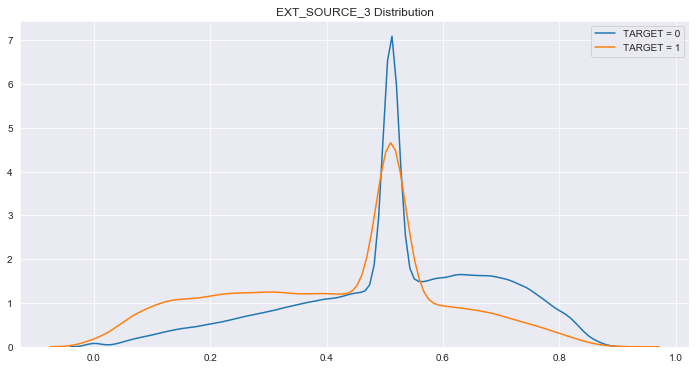

In [251]:
Kde_target('EXT_SOURCE_3',df_train)

In [254]:
# aggregating Numeric Columns

df_bureau_agg = df_bureau.drop(columns=['SK_ID_BUREAU']).groupby('SK_ID_CURR',as_index=False).agg(['count','mean','max','min','sum']).reset_index()
df_bureau_agg

SK_ID_CURR DAYS_CREDIT                                  \
                        count         mean   max   min    sum   
0          100001           7  -735.000000   -49 -1572  -5145   
1          100002           8  -874.000000  -103 -1437  -6992   
2          100003           4 -1400.750000  -606 -2586  -5603   
3          100004           2  -867.000000  -408 -1326  -1734   
4          100005           3  -190.666667   -62  -373   -572   
...           ...         ...          ...   ...   ...    ...   
305806     456249          13 -1667.076923  -483 -2713 -21672   
305807     456250           3  -862.000000  -760 -1002  -2586   
305808     456253           4  -867.500000  -713  -919  -3470   
305809     456254           1 -1104.000000 -1104 -1104  -1104   
305810     456255          11 -1089.454545  -363 -2337 -11984   

       CREDIT_DAY_OVERDUE                  DAYS_CREDIT_ENDDATE               \
                    count mean max min sum               count         mean   
0                       7  0.0   0   0   0                   7    82.428571   
1                       8  0.0   0   0   0                   8  -134.120659   
2                       4  0.0   0   0   0                   4  -544.500000   
3                       2  0.0   0   0   0                   2  -488.500000   
4                       3  0.0   0   0   0                   3   439.333333   
...                   ...  ...  ..  ..  ..                 ...          ...   
305806                 13  0.0   0   0   0                  13 -1098.267895   
305807                  3  0.0   0   0   0                   3  1288.333333   
305808                  4  0.0   0   0   0                   4   280.500000   
305809                  1  0.0   0   0   0                   1  -859.000000   
305810                 11  0.0   0   0   0                  11  3231.272727   

                                      DAYS_ENDDATE_FACT                      \
            max     min           sum             count         mean    max   
0        1778.0 -1329.0    577.000000                 7  -907.758778 -544.0   
1         780.0 -1072.0  -1072.965275                 8  -777.484287  -36.0   
2        1216.0 -2434.0  -2178.000000                 4 -1077.359287 -540.0   
3        -382.0  -595.0   -977.000000                 2  -532.500000 -382.0   
4        1324.0  -128.0   1318.000000                 3  -719.291432 -123.0   
...         ...     ...           ...               ...          ...    ...   
305806   1363.0 -2499.0 -14277.482638                13 -1338.033627 -291.0   
305807   2340.0  -272.0   3865.000000                 3  -931.624765 -760.0   
305808   1113.0  -189.0   1122.000000                 4  -905.718574 -794.0   
305809   -859.0  -859.0   -859.000000                 1  -859.000000 -859.0   
305810  27320.0 -1243.0  35544.000000                11  -990.653249 -712.0   

                                  CNT_CREDIT_PROLONG                        \
                min           sum              count      mean max min sum   
0      -1328.000000  -6354.311444                  7  0.000000   0   0   0   
1      -1185.000000  -6219.874296                  8  0.000000   0   0   0   
2      -2131.000000  -4309.437148                  4  0.000000   0   0   0   
3       -683.000000  -1065.000000                  2  0.000000   0   0   0   
4      -1017.437148  -2157.874296                  3  0.000000   0   0   0   
...             ...           ...                ...       ...  ..  ..  ..   
305806 -2525.000000 -17394.437148                 13  0.000000   0   0   0   
305807 -1017.437148  -2794.874296                  3  0.000000   0   0   0   
305808 -1017.437148  -3622.874296                  4  0.000000   0   0   0   
305809  -859.000000   -859.000000                  1  0.000000   0   0   0   
305810 -1621.000000 -10897.185740                 11  0.090909   1   0   1   

       AMT_CREDIT_SUM                                                   \
                

In [266]:
# list of columns name 
columns = ['SK_ID_CURR']
for var in df_bureau_agg.columns.levels[0]:
    if var !='SK_ID_CURR':
        
        # iterate 
        for stat in df_bureau_agg.columns.levels[1][:-1]:
            columns.append('bureau_%s_%s'%(var,stat))

In [268]:
# assign columns name in groupby function
df_bureau_agg.columns=columns
df_bureau_agg.head()

SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   bureau_CREDIT_DAY_OVERDUE_sum  bureau_DAYS_CREDIT_ENDDATE_count  \
0                              0                                 7   
1                              0                                 8   
2                              0                                 4   
3                              0                                 2   
4                              0                                 3   

   bureau_DAYS_CREDIT_ENDDATE_mean  bureau_DAYS_CREDIT_ENDDATE_max  \
0                        82.428571                          1778.0   
1                      -134.120659                           780.0   
2                      -544.500000                          1216.0   
3                      -488.500000                          -382.0   
4                       439.333333                          1324.0   

   bureau_DAYS_CREDIT_ENDDATE_min  bureau_DAYS_CREDIT_ENDDATE_sum  \
0                         -1329.0                      577.000000   
1                         -1072.0                    -1072.965275   
2                         -2434.0                    -2178.000000   
3                          -595.0                     -977.000000   
4                          -128.0                     1318.000000   

   bureau_DAYS_ENDDATE_FACT_count  bureau_DAYS_ENDDATE_FACT_mean  \
0                               7                    -907.758778   
1                               8                    -777.484287   
2                               4                   -1077.359287   
3                               2                    -532.500000   
4                               3                    -719.291432   

   bureau_DAYS_ENDDATE_FACT_max  bureau_DAYS_ENDDATE_FACT_min  \
0                        -544.0                  -1328.000000   
1                         -36.0                  -1185.000000   
2                        -540.0                  -2131.000000   
3                        -382.0                   -683.000000   
4                        -123.0                  -1017.437148   

   bureau_DAYS_ENDDATE_FACT_sum  bureau_CNT_CREDIT_PROLONG_count  \
0                  -6354.311444                                7   
1                  -6219.874296                                8   
2                  -4309.437148               

In [269]:
# checking missin values 
manage_df.missing_data_display(df_bureau_agg)

Total  Percent
bureau_DAYS_CREDIT_UPDATE_sum            0      0.0
bureau_DAYS_CREDIT_ENDDATE_mean          0      0.0
bureau_CNT_CREDIT_PROLONG_mean           0      0.0
bureau_CNT_CREDIT_PROLONG_count          0      0.0
bureau_DAYS_ENDDATE_FACT_sum             0      0.0
bureau_DAYS_ENDDATE_FACT_min             0      0.0
bureau_DAYS_ENDDATE_FACT_max             0      0.0
bureau_DAYS_ENDDATE_FACT_mean            0      0.0
bureau_DAYS_ENDDATE_FACT_count           0      0.0
bureau_DAYS_CREDIT_ENDDATE_sum           0      0.0
bureau_DAYS_CREDIT_ENDDATE_min           0      0.0
bureau_DAYS_CREDIT_ENDDATE_max           0      0.0
bureau_DAYS_CREDIT_ENDDATE_count         0      0.0
bureau_CNT_CREDIT_PROLONG_min            0      0.0
bureau_CREDIT_DAY_OVERDUE_sum            0      0.0
bureau_CREDIT_DAY_OVERDUE_min            0      0.0
bureau_CREDIT_DAY_OVERDUE_max            0      0.0
bureau_CREDIT_DAY_OVERDUE_mean           0      0.0
bureau_CREDIT_DAY_OVERDUE_count          0      0.0
bureau_DAYS_CREDIT_sum                   0      0.0
bureau_DAYS_CREDIT_min                   0      0.0
bureau_DAYS_CREDIT_max                   0      0.0
bureau_DAYS_CREDIT_mean                  0      0.0
bureau_DAYS_CREDIT_count                 0      0.0
bureau_CNT_CREDIT_PROLONG_max            0      0.0
bureau_CNT_CREDIT_PROLONG_sum            0      0.0
bureau_DAYS_CREDIT_UPDATE_min            0      0.0
bureau_AMT_CREDIT_SUM_LIMIT_max          0      0.0
bureau_DAYS_CREDIT_UPDATE_max            0      0.0
bureau_DAYS_CREDIT_UPDATE_mean           0      0.0
bureau_DAYS_CREDIT_UPDATE_count          0      0.0
bureau_AMT_CREDIT_SUM_OVERDUE_sum        0      0.0
bureau_AMT_CREDIT_SUM_OVERDUE_min        0      0.0
bureau_AMT_CREDIT_SUM_OVERDUE_max        0      0.0
bureau_AMT_CREDIT_SUM_OVERDUE_mean       0      0.0
bureau_AMT_CREDIT_SUM_OVERDUE_count      0      0.0
bureau_AMT_CREDIT_SUM_LIMIT_sum          0      0.0
bureau_AMT_CREDIT_SUM_LIMIT_min          0      0.0
bureau_AMT_CREDIT_SUM_LIMIT_mean         0      0.0
bureau_AMT_CREDIT_SUM_count              0      0.0
bureau_AMT_CREDIT_SUM_LIMIT_count        0      0.0
bureau_AMT_CREDIT_SUM_DEBT_sum           0      0.0
bureau_AMT_CREDIT_SUM_DEBT_min           0      0.0
bureau_AMT_CREDIT_SUM_DEBT_max           0      0.0
bureau_AMT_CREDIT_SUM_DEBT_mean          0      0.0
bureau_AMT_CREDIT_SUM_DEBT_count         0      0.0
bureau_AMT_CREDIT_SUM_sum                0      0.0
bureau_AMT_CREDIT_SUM_min                0      0.0
bureau_AMT_CREDIT_SUM_max                0      0.0
bureau_AMT_CREDIT_SUM_mean               0      0.0
SK_ID_CURR                               0      0.0

In [270]:
# meger with training data 

df_train = df_train.merge(df_bureau_agg,on='SK_ID_CURR',how='left')
df_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [271]:
#shape
print(df_train.shape)
df_train.head()

(307511, 124)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [272]:
# Checking correlations aggregated values with target 

# list of new correlation

new_corr= []

# iteration with columns

for col in columns:
    corr = df_train['TARGET'].corr(df_train[col])
    
    new_corr.append((col,corr))

In [274]:
# sort the correlation with absolute value

new_corr = sorted(new_corr,key = lambda x:abs(x[1]),reverse=True)
new_corr[:15]

[('bureau_DAYS_CREDIT_mean', 0.08972896721998122),
 ('bureau_DAYS_CREDIT_min', 0.0752482510301036),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968668),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.05498252752484824),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.05268341491320094),
 ('bureau_DAYS_CREDIT_max', 0.049782054639973095),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.04525672189593729),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.042863922470730176),
 ('bureau_DAYS_CREDIT_sum', 0.04199982481484684),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.04140363535306004),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.03757463372928714),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.03589888705486918),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.033340104619412135),
 ('bureau_DAYS_CREDIT_UPDATE_max', 0.028233546896535826),
 ('bureau_AMT_CREDIT_SUM_mean', -0.01995614594228652)]

The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.0897
Median value for loan that was not repaid = -835.3333
Median value for loan that was repaid = -1067.0000


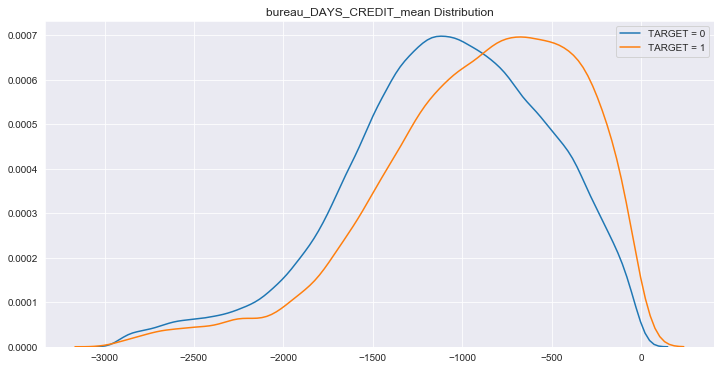

In [275]:
Kde_target('bureau_DAYS_CREDIT_mean',df_train)

In [287]:
def agg_numeric(df,group_var,df_name):
    
    # remove primary id variables 
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns=col)
            
    group_ids = df[group_var]
    df_num = df.select_dtypes(exclude = 'object')
    df_num[group_var] =group_ids
    
    
    
    # group by specific variable and cal statistic
    
    df_agg = df_num.groupby(group_var).agg(['count','mean','max','min','sum']).reset_index()
    
    
    # all columns name 
    
    columns = [group_var]
    
    # iteration for adding all columns name 
    
    
    for var in df_agg.columns.levels[0]:
        # skip group name
        if var != group_var:
            
            # iteration again
            for stat in df_agg.columns.levels[1][:-1]:
                columns.append('%s_%s_%s' %(df_name,var,stat))
                
    df_agg.columns = columns
    return df_agg
    

In [355]:
# Aggregation dataframe from Bureau dataframe  
df_bureau_num = manage_agg_cat.agg_numeric(df_bureau,group_var='SK_ID_CURR',df_name='bureau')
print(df_bureau_num.shape)
df_bureau_num.head()

(305811, 51)


SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   bureau_CREDIT_DAY_OVERDUE_sum  bureau_DAYS_CREDIT_ENDDATE_count  \
0                              0                                 7   
1                              0                                 8   
2                              0                                 4   
3                              0                                 2   
4                              0                                 3   

   bureau_DAYS_CREDIT_ENDDATE_mean  bureau_DAYS_CREDIT_ENDDATE_max  \
0                        82.428571                          1778.0   
1                      -134.120659                           780.0   
2                      -544.500000                          1216.0   
3                      -488.500000                          -382.0   
4                       439.333333                          1324.0   

   bureau_DAYS_CREDIT_ENDDATE_min  bureau_DAYS_CREDIT_ENDDATE_sum  \
0                         -1329.0                      577.000000   
1                         -1072.0                    -1072.965275   
2                         -2434.0                    -2178.000000   
3                          -595.0                     -977.000000   
4                          -128.0                     1318.000000   

   bureau_DAYS_ENDDATE_FACT_count  bureau_DAYS_ENDDATE_FACT_mean  \
0                               7                    -907.758778   
1                               8                    -777.484287   
2                               4                   -1077.359287   
3                               2                    -532.500000   
4                               3                    -719.291432   

   bureau_DAYS_ENDDATE_FACT_max  bureau_DAYS_ENDDATE_FACT_min  \
0                        -544.0                  -1328.000000   
1                         -36.0                  -1185.000000   
2                        -540.0                  -2131.000000   
3                        -382.0                   -683.000000   
4                        -123.0                  -1017.437148   

   bureau_DAYS_ENDDATE_FACT_sum  bureau_CNT_CREDIT_PROLONG_count  \
0                  -6354.311444                                7   
1                  -6219.874296                                8   
2                  -4309.437148               

In [356]:
# counting SK_ID_CURR on aggregation dataframe of bureau dataframe 
df_bureau_num['SK_ID_CURR'].duplicated().sum()

0

In [342]:
# categorical dataframe from bureau dataframe 
df_bureau_cat = manage_agg_cat.count_categorical(df_bureau,group_var='SK_ID_CURR',df_name='bureau')
print(df_bureau_cat.shape)
df_bureau_cat.head()

(305811, 47)


SK_ID_CURR  bureau_CREDIT_ACTIVE_Active_count  \
0      100001                                  3   
1      100002                                  2   
2      100003                                  1   
3      100004                                  0   
4      100005                                  2   

   bureau_CREDIT_ACTIVE_Active_count_norm  \
0                                0.428571   
1                                0.250000   
2                                0.250000   
3                                0.000000   
4                                0.666667   

   bureau_CREDIT_ACTIVE_Bad debt_count  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   bureau_CREDIT_ACTIVE_Bad debt_count_norm  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   bureau_CREDIT_ACTIVE_Closed_count  bureau_CREDIT_ACTIVE_Closed_count_norm  \
0                                  4                                0.571429   
1                                  6                                0.750000   
2                                  3                                0.750000   
3                                  2                                1.000000   
4                                  1                                0.333333   

   bureau_CREDIT_ACTIVE_Sold_count  bureau_CREDIT_ACTIVE_Sold_count_norm  \
0                                0                                   0.0   
1                                0                                   0.0   
2                                0                                   0.0   
3                                0                                   0.0   
4                                0                                   0.0   

   bureau_CREDIT_CURRENCY_currency 1_count  \
0                                        7   
1                                        8   
2                                        4   
3                                        2   
4                                        3   

   bureau_CREDIT_CURRENCY_currency 1_count_norm  \
0                                           1.0   
1                                           1.0   
2                                           1.0   
3                                           1.0   
4                                           1.0   

   bureau_CREDIT_CURRENCY_currency 2_count  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   bureau_CREDIT_CURRENCY_currency 2_count_norm  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   bureau_CREDIT_CURRENCY_currency 3_count  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   bureau_CREDIT_CURRENCY_currency 3_count_norm  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   bureau_CREDIT_CURRENCY_currency 4_count  \
0                                        0   
1                                        0   
2                                        0   
3        

In [345]:
# counting SK_ID_CURR on aggregation dataframe of bureau dataframe 
df_bureau_cat['SK_ID_CURR'].duplicated().sum()

0

In [357]:
# merging bureau_agg and  bureau_num

df_bureau_final = df_bureau_num.merge(df_bureau_cat,on='SK_ID_CURR',how = 'inner')
print(df_bureau_final.shape)
df_bureau_final.head()

(305811, 97)


SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   bureau_CREDIT_DAY_OVERDUE_sum  bureau_DAYS_CREDIT_ENDDATE_count  \
0                              0                                 7   
1                              0                                 8   
2                              0                                 4   
3                              0                                 2   
4                              0                                 3   

   bureau_DAYS_CREDIT_ENDDATE_mean  bureau_DAYS_CREDIT_ENDDATE_max  \
0                        82.428571                          1778.0   
1                      -134.120659                           780.0   
2                      -544.500000                          1216.0   
3                      -488.500000                          -382.0   
4                       439.333333                          1324.0   

   bureau_DAYS_CREDIT_ENDDATE_min  bureau_DAYS_CREDIT_ENDDATE_sum  \
0                         -1329.0                      577.000000   
1                         -1072.0                    -1072.965275   
2                         -2434.0                    -2178.000000   
3                          -595.0                     -977.000000   
4                          -128.0                     1318.000000   

   bureau_DAYS_ENDDATE_FACT_count  bureau_DAYS_ENDDATE_FACT_mean  \
0                               7                    -907.758778   
1                               8                    -777.484287   
2                               4                   -1077.359287   
3                               2                    -532.500000   
4                               3                    -719.291432   

   bureau_DAYS_ENDDATE_FACT_max  bureau_DAYS_ENDDATE_FACT_min  \
0                        -544.0                  -1328.000000   
1                         -36.0                  -1185.000000   
2                        -540.0                  -2131.000000   
3                        -382.0                   -683.000000   
4                        -123.0                  -1017.437148   

   bureau_DAYS_ENDDATE_FACT_sum  bureau_CNT_CREDIT_PROLONG_count  \
0                  -6354.311444                                7   
1                  -6219.874296                                8   
2                  -4309.437148               

In [358]:
# checking missing value in new datagframe df_bureau_final
manage_df.missing_data_display(df_bureau_final)

Total  Percent
bureau_CREDIT_TYPE_Unknown type of loan_count_norm      0      0.0
bureau_DAYS_CREDIT_UPDATE_mean                          0      0.0
bureau_CNT_CREDIT_PROLONG_sum                           0      0.0
bureau_AMT_CREDIT_SUM_count                             0      0.0
bureau_AMT_CREDIT_SUM_mean                              0      0.0
...                                                   ...      ...
bureau_CREDIT_CURRENCY_currency 4_count_norm            0      0.0
bureau_CREDIT_TYPE_Another type of loan_count           0      0.0
bureau_CREDIT_TYPE_Another type of loan_count_norm      0      0.0
bureau_CREDIT_TYPE_Car loan_count                       0      0.0
SK_ID_CURR                                              0      0.0

[97 rows x 2 columns]

#### Bureau Balance 

In [368]:
# display of bureau balance overview
# one row represents one month transaction 
# it has too many SK_ID_BUREAU id repeating

print(df_bureau_balance.shape)
df_bureau_balance.head()

(27299925, 3)


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [369]:
# counting number of SK_ID_BUREAU, one row represent one month transaction with SK_ID_BUREAU
df_bureau_balance['SK_ID_BUREAU'].duplicated().sum()

26482530

In [348]:
# for categorical data on  bureau balance dataframe

df_bureau_balance_cat = manage_agg_cat.count_categorical(df_bureau_balance,group_var='SK_ID_BUREAU',df_name='bureau_balance')
print(df_bureau_balance_cat.shape)
df_bureau_balance_cat.head()

(817395, 17)


SK_ID_BUREAU  bureau_balance_STATUS_0_count  \
0       5001709                              0   
1       5001710                              5   
2       5001711                              3   
3       5001712                             10   
4       5001713                              0   

   bureau_balance_STATUS_0_count_norm  bureau_balance_STATUS_1_count  \
0                            0.000000                              0   
1                            0.060241                              0   
2                            0.750000                              0   
3                            0.526316                              0   
4                            0.000000                              0   

   bureau_balance_STATUS_1_count_norm  bureau_balance_STATUS_2_count  \
0                                 0.0                              0   
1                                 0.0                              0   
2                                 0.0                              0   
3                                 0.0                              0   
4                                 0.0                              0   

   bureau_balance_STATUS_2_count_norm  bureau_balance_STATUS_3_count  \
0                                 0.0                              0   
1                                 0.0                              0   
2                                 0.0                              0   
3                                 0.0                              0   
4                                 0.0                              0   

   bureau_balance_STATUS_3_count_norm  bureau_balance_STATUS_4_count  \
0                                 0.0                              0   
1                                 0.0                              0   
2                                 0.0                              0   
3                                 0.0                              0   
4                                 0.0                              0   

   bureau_balance_STATUS_4_count_norm  bureau_balance_STATUS_5_count  \
0                                 0.0                              0   
1                                 0.0                              0   
2                                 0.0                              0   
3                                 0.0                              0   
4                                 0.0                              0   

   bureau_balance_STATUS_5_count_norm  bureau_balance_STATUS_C_count  \
0                                 0.0                             86   
1                                 0.0                             48   
2                                 0.0                              0   
3                                 0.0                              9   
4                                 0.0                              0   

   bureau_balance_STATUS_C_count_norm  bureau_balance_STATUS_X_count  \
0                            0.886598                             11   
1                            0.578313                             30   
2                            0.000000                              1   
3                            0.473684                              0   
4                            0.000000                             22   

   bureau_balance_STATUS_X_count_norm  
0                            0.113402  
1                            0.361446  
2                            0.250000  
3                            0.000000  
4                            1.000000

In [352]:
# counting SK_ID_BUREAU
df_bureau_balance_cat['SK_ID_BUREAU'].duplicated().sum()

0

In [353]:
# For numerical data on bureau balance 

df_bureau_balance_num = manage_agg_cat.agg_numeric(df_bureau_balance,group_var='SK_ID_BUREAU',df_name='bureau_balance')
print(df_bureau_balance_num.shape)

df_bureau_balance_num

(817395, 6)


SK_ID_BUREAU  bureau_balance_MONTHS_BALANCE_count  \
0            5001709                                   97   
1            5001710                                   83   
2            5001711                                    4   
3            5001712                                   19   
4            5001713                                   22   
...              ...                                  ...   
817390       6842884                                   48   
817391       6842885                                   24   
817392       6842886                                   33   
817393       6842887                                   37   
817394       6842888                                   62   

        bureau_balance_MONTHS_BALANCE_mean  bureau_balance_MONTHS_BALANCE_max  \
0                                    -48.0                                  0   
1                                    -41.0                                  0   
2                                     -1.5                                  0   
3                                     -9.0                                  0   
4                                    -10.5                                  0   
...                                    ...                                ...   
817390                               -23.5                                  0   
817391                               -11.5                                  0   
817392                               -16.0                                  0   
817393                               -18.0                                  0   
817394                               -30.5                                  0   

        bureau_balance_MONTHS_BALANCE_min  bureau_balance_MONTHS_BALANCE_sum  
0                                     -96                              -4656  
1                                     -82                              -3403  
2                                      -3                                 -6  
3                                     -18                               -171  
4                                     -21                               -231  
...                                   ...                                ...  
817390                                -47                              -1128  
817391                                -23                               -276  
817392                                -32                               -528  
817393                                -36                               -666  
817394                                -61                              -1891  

[817395 rows x 6 columns]

In [354]:
# counting SK_ID_BUREAU in numerical aggregation dataframe of bureau balance 

df_bureau_balance_num['SK_ID_BUREAU'].duplicated().sum()

0

In [329]:
df_bureau[['SK_ID_BUREAU','SK_ID_CURR']]

SK_ID_BUREAU  SK_ID_CURR
0             5714462      215354
1             5714463      215354
2             5714464      215354
3             5714465      215354
4             5714466      215354
...               ...         ...
1716423       5057750      259355
1716424       5057754      100044
1716425       5057762      100044
1716426       5057770      246829
1716427       5057778      246829

[1716428 rows x 2 columns]

In [385]:
# merge bureau balance agg and cat datafarame
df_bureau_balance_final = df_bureau_balance_num.merge(df_bureau_balance_cat,on='SK_ID_BUREAU', how='inner')

print(df_bureau_balance_final.shape)

#merge with df_bureau dataframe where  unique SK_ID_BUREAU represents loan id 
# numbers of unique SK_ID_BUREAU id  represent no of loans
df_bureau_by_loan = df_bureau[['SK_ID_BUREAU','SK_ID_CURR']].merge(df_bureau_balance_final,on='SK_ID_BUREAU' , how ='inner')

print(df_bureau_by_loan.shape)
df_bureau_by_loan.head()



(817395, 22)
(774354, 23)


SK_ID_BUREAU  SK_ID_CURR  bureau_balance_MONTHS_BALANCE_count  \
0       5715448      380361                                   27   
1       5715449      380361                                   12   
2       5715451      380361                                   26   
3       5715452      380361                                   33   
4       5715453      380361                                   38   

   bureau_balance_MONTHS_BALANCE_mean  bureau_balance_MONTHS_BALANCE_max  \
0                               -13.0                                  0   
1                                -5.5                                  0   
2                               -17.5                                 -5   
3                               -16.0                                  0   
4                               -18.5                                  0   

   bureau_balance_MONTHS_BALANCE_min  bureau_balance_MONTHS_BALANCE_sum  \
0                                -26                               -351   
1                                -11                                -66   
2                                -30                               -455   
3                                -32                               -528   
4                                -37                               -703   

   bureau_balance_STATUS_0_count  bureau_balance_STATUS_0_count_norm  \
0                              8                            0.296296   
1                              5                            0.416667   
2                             17                            0.653846   
3                              8                            0.242424   
4                              8                            0.210526   

   bureau_balance_STATUS_1_count  bureau_balance_STATUS_1_count_norm  \
0                              0                                 0.0   
1                              0                                 0.0   
2                              0                                 0.0   
3                              0                                 0.0   
4                              0                                 0.0   

   bureau_balance_STATUS_2_count  bureau_balance_STATUS_2_count_norm  \
0                              0                                 0.0   
1                              0                                 0.0   
2                              0                                 0.0   
3                              0                                 0.0   
4                              0                                 0.0   

   bureau_balance_STATUS_3_count  bureau_balance_STATUS_3_count_norm  \
0                              0                                 0.0   
1                              0                                 0.0   
2                              0                                 0.0   
3                              0                                 0.0   
4                              0                                 0.0   

   bureau_balance_STATUS_4_count  bureau_balance_STATUS_4_count_norm  \
0                              0                                 0.0   
1                              0                                 0.0   
2                              0                                 0.0   
3                              0                                 0.0   
4                              0                                 0.0   

   bureau_balance_STATUS_5_count  bureau_balance_STATUS_5_count_norm  \
0                              0                                 0.0   
1                              0                                 0.0   
2                              0                                 0.0   
3                              0                                 0.0   
4                              0                                 0.0   

   bureau_balance_STATUS_C_count  bureau_balance_STATUS_C_count_norm  \
0               

In [386]:
# again grouping new dataframe with aggregation stastics 

df_bureau_by_loan_final = manage_agg_cat.agg_numeric(df_bureau_by_loan,group_var='SK_ID_CURR',df_name='FinalBurBal')
print(df_bureau_by_loan_final.shape)
df_bureau_by_loan_final.head()

(134542, 106)


SK_ID_CURR  FinalBurBal_bureau_balance_MONTHS_BALANCE_count_count  \
0      100001                                                  7       
1      100002                                                  8       
2      100005                                                  3       
3      100010                                                  2       
4      100013                                                  4       

   FinalBurBal_bureau_balance_MONTHS_BALANCE_count_mean  \
0                                          24.571429      
1                                          13.750000      
2                                           7.000000      
3                                          36.000000      
4                                          57.500000      

   FinalBurBal_bureau_balance_MONTHS_BALANCE_count_max  \
0                                                 52     
1                                                 22     
2                                                 13     
3                                                 36     
4                                                 69     

   FinalBurBal_bureau_balance_MONTHS_BALANCE_count_min  \
0                                                  2     
1                                                  4     
2                                                  3     
3                                                 36     
4                                                 40     

   FinalBurBal_bureau_balance_MONTHS_BALANCE_count_sum  \
0                                                172     
1                                                110     
2                                                 21     
3                                                 72     
4                                                230     

   FinalBurBal_bureau_balance_MONTHS_BALANCE_mean_count  \
0                                                  7      
1                                                  8      
2                                                  3      
3                                                  2      
4                                                  4      

   FinalBurBal_bureau_balance_MONTHS_BALANCE_mean_mean  \
0                                         -11.785714     
1                                         -21.875000     
2                                          -3.000000     
3                                         -46.000000     
4                                         -28.250000     

   FinalBurBal_bureau_balance_MONTHS_BALANCE_mean_max  \
0                                               -0.5    
1                                               -1.5    
2                                               -1.0    
3                                              -19.5    
4                                              -19.5    

   FinalBurBal_bureau_balance_MONTHS_BALANCE_mean_min  \
0                                              -25.5    
1                                              -39.5    
2                                               -6.0    
3                                              -72.5    
4                                              -34.0    

   FinalBurBal_bureau_balance_MONTHS_BALANCE_mean_sum  \
0                                              -82.5    
1                                             -175.0    
2                                               -9.0    
3                                              -92.0    
4                                             -113.0    

   FinalBurBal_bureau_balance_MONTHS_BALANCE_max_count  \
0                                                  7     
1                                                  8     
2                                                  3     
3                                                  2     
4                                                  4     

   FinalBurBal_bureau_balance_MONTHS_BALANCE_max_mean  \
0                            

In [388]:
# now merging final bureau balance dataframe and final bureau dataframe

df_bureauAndbureaubalance = df_bureau_final.merge(df_bureau_by_loan_final,on='SK_ID_CURR')
print(df_bureauAndbureaubalance.shape)

# save df_bureauAndbureaubalance dataframe into csv file 
# which came from df_bureau and df_bureau dataframe after aggrigation statistic 
#  on both numeric and categorical data type

df_bureauAndbureaubalance.to_csv('BureauAndBureaubalance.csv')

df_bureauAndbureaubalance.head()

(134542, 202)


SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100005                         3              -190.666667   
3      100010                         2             -1939.500000   
4      100013                         4             -1737.500000   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                     -62                    -373                    -572   
3                   -1138                   -2741                   -3879   
4                   -1210                   -2070                   -6950   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                3                             0.0   
3                                2                             0.0   
4                                4                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   bureau_CREDIT_DAY_OVERDUE_sum  bureau_DAYS_CREDIT_ENDDATE_count  \
0                              0                                 7   
1                              0                                 8   
2                              0                                 3   
3                              0                                 2   
4                              0                                 4   

   bureau_DAYS_CREDIT_ENDDATE_mean  bureau_DAYS_CREDIT_ENDDATE_max  \
0                        82.428571                          1778.0   
1                      -134.120659                           780.0   
2                       439.333333                          1324.0   
3                      -119.500000                           689.0   
4                     -1068.000000                          -567.0   

   bureau_DAYS_CREDIT_ENDDATE_min  bureau_DAYS_CREDIT_ENDDATE_sum  \
0                         -1329.0                      577.000000   
1                         -1072.0                    -1072.965275   
2                          -128.0                     1318.000000   
3                          -928.0                     -239.000000   
4                         -1707.0                    -4272.000000   

   bureau_DAYS_ENDDATE_FACT_count  bureau_DAYS_ENDDATE_FACT_mean  \
0                               7                    -907.758778   
1                               8                    -777.484287   
2                               3                    -719.291432   
3                               2                   -1077.718574   
4                               4                   -1054.750000   

   bureau_DAYS_ENDDATE_FACT_max  bureau_DAYS_ENDDATE_FACT_min  \
0                   -544.000000                  -1328.000000   
1                    -36.000000                  -1185.000000   
2                   -123.000000                  -1017.437148   
3                  -1017.437148                  -1138.000000   
4                   -549.000000                  -1334.000000   

   bureau_DAYS_ENDDATE_FACT_sum  bureau_CNT_CREDIT_PROLONG_count  \
0                  -6354.311444                                7   
1                  -6219.874296                                8   
2                  -2157.874296               

In [402]:
# check missing values on final dataframe which came from bureau and bureau balance

manage_df.missing_data_display(df_bureauAndbureaubalance).head(45)

Total  Percent
FinalBurBal_bureau_balance_STATUS_X_count_norm_sum      0      0.0
bureau_CREDIT_CURRENCY_currency 3_count                 0      0.0
bureau_CREDIT_TYPE_Consumer credit_count                0      0.0
bureau_CREDIT_TYPE_Cash loan (non-earmarked)_co...      0      0.0
bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count      0      0.0
bureau_CREDIT_TYPE_Car loan_count_norm                  0      0.0
bureau_CREDIT_TYPE_Car loan_count                       0      0.0
bureau_CREDIT_TYPE_Another type of loan_count_norm      0      0.0
bureau_CREDIT_TYPE_Another type of loan_count           0      0.0
bureau_CREDIT_CURRENCY_currency 4_count_norm            0      0.0
bureau_CREDIT_CURRENCY_currency 4_count                 0      0.0
bureau_CREDIT_CURRENCY_currency 3_count_norm            0      0.0
bureau_CREDIT_CURRENCY_currency 2_count_norm            0      0.0
bureau_DAYS_CREDIT_UPDATE_sum                           0      0.0
bureau_CREDIT_CURRENCY_currency 2_count                 0      0.0
bureau_CREDIT_CURRENCY_currency 1_count_norm            0      0.0
bureau_CREDIT_CURRENCY_currency 1_count                 0      0.0
bureau_CREDIT_ACTIVE_Sold_count_norm                    0      0.0
bureau_CREDIT_ACTIVE_Sold_count                         0      0.0
bureau_CREDIT_ACTIVE_Closed_count_norm                  0      0.0
bureau_CREDIT_ACTIVE_Closed_count                       0      0.0
bureau_CREDIT_ACTIVE_Bad debt_count_norm                0      0.0
bureau_CREDIT_ACTIVE_Bad debt_count                     0      0.0
bureau_CREDIT_ACTIVE_Active_count_norm                  0      0.0
bureau_CREDIT_TYPE_Consumer credit_count_norm           0      0.0
bureau_CREDIT_TYPE_Credit card_count                    0      0.0
bureau_CREDIT_TYPE_Credit card_count_norm               0      0.0
bureau_CREDIT_TYPE_Interbank credit_count               0      0.0
FinalBurBal_bureau_balance_MONTHS_BALANCE_count...      0      0.0
FinalBurBal_bureau_balance_MONTHS_BALANCE_count...      0      0.0
bureau_CREDIT_TYPE_Unknown type of loan_count_norm      0      0.0
bureau_CREDIT_TYPE_Unknown type of loan_count           0      0.0
bureau_CREDIT_TYPE_Real estate loan_count_norm          0      0.0
bureau_CREDIT_TYPE_Real estate loan_count               0      0.0
bureau_CREDIT_TYPE_Mortgage_count_norm                  0      0.0
bureau_CREDIT_TYPE_Mortgage_count                       0      0.0
bureau_CREDIT_TYPE_Mobile operator loan_count_norm      0      0.0
bureau_CREDIT_TYPE_Mobile operator loan_count           0      0.0
bureau_CREDIT_TYPE_Microloan_count_norm                 0      0.0
bureau_CREDIT_TYPE_Microloan_count                      0      0.0
bureau_CREDIT_TYPE_Loan for working capital rep...      0      0.0
bureau_CREDIT_TYPE_Loan for working capital rep...      0      0.0
bureau_CREDIT_TYPE_Loan for the purchase of equ...      0      0.0
bureau_CREDIT_TYPE_Loan for the purchase of equ...      0      0.0
bureau_CREDIT_TYPE_Loan for purchase of shares ...      0      0.0

#### application train data 

In [392]:
# aggregation data numeric data
df_train_num = manage_agg_cat.agg_numeric(df_app_train.drop(columns = ['TARGET']),group_var='SK_ID_CURR',df_name='train')
print(df_train_num.shape)
df_train_num.head()

(307511, 296)


SK_ID_CURR  train_CNT_CHILDREN_count  train_CNT_CHILDREN_mean  \
0      100002                         1                        0   
1      100003                         1                        0   
2      100004                         1                        0   
3      100006                         1                        0   
4      100007                         1                        0   

   train_CNT_CHILDREN_max  train_CNT_CHILDREN_min  train_CNT_CHILDREN_sum  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   train_AMT_INCOME_TOTAL_count  train_AMT_INCOME_TOTAL_mean  \
0                             1                     202500.0   
1                             1                     270000.0   
2                             1                      67500.0   
3                             1                     135000.0   
4                             1                     121500.0   

   train_AMT_INCOME_TOTAL_max  train_AMT_INCOME_TOTAL_min  \
0                    202500.0                    202500.0   
1                    270000.0                    270000.0   
2                     67500.0                     67500.0   
3                    135000.0                    135000.0   
4                    121500.0                    121500.0   

   train_AMT_INCOME_TOTAL_sum  train_AMT_CREDIT_count  train_AMT_CREDIT_mean  \
0                    202500.0                       1               406597.5   
1                    270000.0                       1              1293502.5   
2                     67500.0                       1               135000.0   
3                    135000.0                       1               312682.5   
4                    121500.0                       1               513000.0   

   train_AMT_CREDIT_max  train_AMT_CREDIT_min  train_AMT_CREDIT_sum  \
0              406597.5              406597.5              406597.5   
1             1293502.5             1293502.5             1293502.5   
2              135000.0              135000.0              135000.0   
3              312682.5              312682.5              312682.5   
4              513000.0              513000.0              513000.0   

   train_AMT_ANNUITY_count  train_AMT_ANNUITY_mean  train_AMT_ANNUITY_max  \
0                        1                 24700.5                24700.5   
1                        1                 35698.5                35698.5   
2                        1                  6750.0                 6750.0   
3                        1                 29686.5                29686.5   
4                        1                 21865.5                21865.5   

   train_AMT_ANNUITY_min  train_AMT_ANNUITY_sum  train_AMT_GOODS_PRICE_count  \
0                24700.5                24700.5                            1   
1                35698.5                35698.5                            1   
2                 6750.0                 6750.0                            1   
3                29686.5                29686.5                            1   
4                21865.5                21865.5                            1   

   train_AMT_GOODS_PRICE_mean  train_AMT_GOODS_PRICE_max  \
0                    351000.0                   351000.0   
1                   1129500.0                  1129500.0   
2                    135000.0                   135000.0   
3                    297000.0                   297000.0   
4                    513000.0                   513000.0   

   train_AMT_GOODS_PRICE_min  train_AMT_GOODS_PRICE_sum  \
0                   351000.0                   351000.0   
1                  1129500.0                  11

In [394]:
# joining target 

df_train_num = df_train_num.merge(df_app_train[['SK_ID_CURR','TARGET']],on='SK_ID_CURR',how ='left')
print(df_train_num.shape)
df_train_num.head()

(307511, 297)


SK_ID_CURR  train_CNT_CHILDREN_count  train_CNT_CHILDREN_mean  \
0      100002                         1                        0   
1      100003                         1                        0   
2      100004                         1                        0   
3      100006                         1                        0   
4      100007                         1                        0   

   train_CNT_CHILDREN_max  train_CNT_CHILDREN_min  train_CNT_CHILDREN_sum  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   train_AMT_INCOME_TOTAL_count  train_AMT_INCOME_TOTAL_mean  \
0                             1                     202500.0   
1                             1                     270000.0   
2                             1                      67500.0   
3                             1                     135000.0   
4                             1                     121500.0   

   train_AMT_INCOME_TOTAL_max  train_AMT_INCOME_TOTAL_min  \
0                    202500.0                    202500.0   
1                    270000.0                    270000.0   
2                     67500.0                     67500.0   
3                    135000.0                    135000.0   
4                    121500.0                    121500.0   

   train_AMT_INCOME_TOTAL_sum  train_AMT_CREDIT_count  train_AMT_CREDIT_mean  \
0                    202500.0                       1               406597.5   
1                    270000.0                       1              1293502.5   
2                     67500.0                       1               135000.0   
3                    135000.0                       1               312682.5   
4                    121500.0                       1               513000.0   

   train_AMT_CREDIT_max  train_AMT_CREDIT_min  train_AMT_CREDIT_sum  \
0              406597.5              406597.5              406597.5   
1             1293502.5             1293502.5             1293502.5   
2              135000.0              135000.0              135000.0   
3              312682.5              312682.5              312682.5   
4              513000.0              513000.0              513000.0   

   train_AMT_ANNUITY_count  train_AMT_ANNUITY_mean  train_AMT_ANNUITY_max  \
0                        1                 24700.5                24700.5   
1                        1                 35698.5                35698.5   
2                        1                  6750.0                 6750.0   
3                        1                 29686.5                29686.5   
4                        1                 21865.5                21865.5   

   train_AMT_ANNUITY_min  train_AMT_ANNUITY_sum  train_AMT_GOODS_PRICE_count  \
0                24700.5                24700.5                            1   
1                35698.5                35698.5                            1   
2                 6750.0                 6750.0                            1   
3                29686.5                29686.5                            1   
4                21865.5                21865.5                            1   

   train_AMT_GOODS_PRICE_mean  train_AMT_GOODS_PRICE_max  \
0                    351000.0                   351000.0   
1                   1129500.0                  1129500.0   
2                    135000.0                   135000.0   
3                    297000.0                   297000.0   
4                    513000.0                   513000.0   

   train_AMT_GOODS_PRICE_min  train_AMT_GOODS_PRICE_sum  \
0                   351000.0                   351000.0   
1                  1129500.0                  11

In [395]:
# categorical data for application train

df_train_cat = manage_agg_cat.count_categorical(df_app_train,group_var='SK_ID_CURR',df_name='train')
print(df_train_cat.shape)
df_train_cat.head()

(307511, 253)


SK_ID_CURR  train_NAME_CONTRACT_TYPE_Cash loans_count  \
0      100002                                          1   
1      100003                                          1   
2      100004                                          0   
3      100006                                          1   
4      100007                                          1   

   train_NAME_CONTRACT_TYPE_Cash loans_count_norm  \
0                                               1   
1                                               1   
2                                               0   
3                                               1   
4                                               1   

   train_NAME_CONTRACT_TYPE_Revolving loans_count  \
0                                               0   
1                                               0   
2                                               1   
3                                               0   
4                                               0   

   train_NAME_CONTRACT_TYPE_Revolving loans_count_norm  \
0                                                  0     
1                                                  0     
2                                                  1     
3                                                  0     
4                                                  0     

   train_CODE_GENDER_F_count  train_CODE_GENDER_F_count_norm  \
0                          0                               0   
1                          1                               1   
2                          0                               0   
3                          1                               1   
4                          0                               0   

   train_CODE_GENDER_M_count  train_CODE_GENDER_M_count_norm  \
0                          1                               1   
1                          0                               0   
2                          1                               1   
3                          0                               0   
4                          1                               1   

   train_CODE_GENDER_XNA_count  train_CODE_GENDER_XNA_count_norm  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   train_FLAG_OWN_CAR_N_count  train_FLAG_OWN_CAR_N_count_norm  \
0                           1                                1   
1                           1                                1   
2                           0                                0   
3                           1                                1   
4                           1                                1   

   train_FLAG_OWN_CAR_Y_count  train_FLAG_OWN_CAR_Y_count_norm  \
0                           0                                0   
1                           0                                0   
2                           1                                1   
3                           0                                0   
4                           0                                0   

   train_FLAG_OWN_REALTY_N_count  train_FLAG_OWN_REALTY_N_count_norm  \
0                              0                                   0   
1                              1                                   1   
2                              0                                   0   
3                              0                                   0   
4                              0                                   0   

   train_FLAG_OWN_REALTY_Y_count  train_FLAG_OWN_REALTY_Y_count_norm  \
0                              1                                   1   
1                              0                                   0   
2                              1 

In [397]:
# merging numeric agg and categorical train dataframe 

df_train_final = df_train_num.merge(df_train_cat,on='SK_ID_CURR')
print(df_train_final.shape)
df_train_final.head()

(307511, 549)


SK_ID_CURR  train_CNT_CHILDREN_count  train_CNT_CHILDREN_mean  \
0      100002                         1                        0   
1      100003                         1                        0   
2      100004                         1                        0   
3      100006                         1                        0   
4      100007                         1                        0   

   train_CNT_CHILDREN_max  train_CNT_CHILDREN_min  train_CNT_CHILDREN_sum  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   train_AMT_INCOME_TOTAL_count  train_AMT_INCOME_TOTAL_mean  \
0                             1                     202500.0   
1                             1                     270000.0   
2                             1                      67500.0   
3                             1                     135000.0   
4                             1                     121500.0   

   train_AMT_INCOME_TOTAL_max  train_AMT_INCOME_TOTAL_min  \
0                    202500.0                    202500.0   
1                    270000.0                    270000.0   
2                     67500.0                     67500.0   
3                    135000.0                    135000.0   
4                    121500.0                    121500.0   

   train_AMT_INCOME_TOTAL_sum  train_AMT_CREDIT_count  train_AMT_CREDIT_mean  \
0                    202500.0                       1               406597.5   
1                    270000.0                       1              1293502.5   
2                     67500.0                       1               135000.0   
3                    135000.0                       1               312682.5   
4                    121500.0                       1               513000.0   

   train_AMT_CREDIT_max  train_AMT_CREDIT_min  train_AMT_CREDIT_sum  \
0              406597.5              406597.5              406597.5   
1             1293502.5             1293502.5             1293502.5   
2              135000.0              135000.0              135000.0   
3              312682.5              312682.5              312682.5   
4              513000.0              513000.0              513000.0   

   train_AMT_ANNUITY_count  train_AMT_ANNUITY_mean  train_AMT_ANNUITY_max  \
0                        1                 24700.5                24700.5   
1                        1                 35698.5                35698.5   
2                        1                  6750.0                 6750.0   
3                        1                 29686.5                29686.5   
4                        1                 21865.5                21865.5   

   train_AMT_ANNUITY_min  train_AMT_ANNUITY_sum  train_AMT_GOODS_PRICE_count  \
0                24700.5                24700.5                            1   
1                35698.5                35698.5                            1   
2                 6750.0                 6750.0                            1   
3                29686.5                29686.5                            1   
4                21865.5                21865.5                            1   

   train_AMT_GOODS_PRICE_mean  train_AMT_GOODS_PRICE_max  \
0                    351000.0                   351000.0   
1                   1129500.0                  1129500.0   
2                    135000.0                   135000.0   
3                    297000.0                   297000.0   
4                    513000.0                   513000.0   

   train_AMT_GOODS_PRICE_min  train_AMT_GOODS_PRICE_sum  \
0                   351000.0                   351000.0   
1                  1129500.0                  11

In [401]:
# check missing values tain final dataframe 

manage_df.missing_data_display(df_train_final)


Total  Percent
train_ORGANIZATION_TYPE_XNA_count_norm                  0      0.0
train_FLAG_DOCUMENT_4_min                               0      0.0
train_FLAG_DOCUMENT_5_sum                               0      0.0
train_FLAG_DOCUMENT_5_min                               0      0.0
train_FLAG_DOCUMENT_5_max                               0      0.0
...                                                   ...      ...
train_NAME_HOUSING_TYPE_House / apartment_count         0      0.0
train_NAME_HOUSING_TYPE_House / apartment_count...      0      0.0
train_NAME_HOUSING_TYPE_Municipal apartment_count       0      0.0
train_NAME_HOUSING_TYPE_Municipal apartment_cou...      0      0.0
SK_ID_CURR                                              0      0.0

[549 rows x 2 columns]

In [405]:
# merging train final dataframe and bureau final dataframe

df_train_bureau = df_train_final.merge(df_bureauAndbureaubalance,on='SK_ID_CURR',how ='left')
print(df_train_bureau.shape)
df_train_bureau.to_csv("train_bureau.csv")
df_train_bureau.head()

(307511, 750)


SK_ID_CURR  train_CNT_CHILDREN_count  train_CNT_CHILDREN_mean  \
0      100002                         1                        0   
1      100003                         1                        0   
2      100004                         1                        0   
3      100006                         1                        0   
4      100007                         1                        0   

   train_CNT_CHILDREN_max  train_CNT_CHILDREN_min  train_CNT_CHILDREN_sum  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   train_AMT_INCOME_TOTAL_count  train_AMT_INCOME_TOTAL_mean  \
0                             1                     202500.0   
1                             1                     270000.0   
2                             1                      67500.0   
3                             1                     135000.0   
4                             1                     121500.0   

   train_AMT_INCOME_TOTAL_max  train_AMT_INCOME_TOTAL_min  \
0                    202500.0                    202500.0   
1                    270000.0                    270000.0   
2                     67500.0                     67500.0   
3                    135000.0                    135000.0   
4                    121500.0                    121500.0   

   train_AMT_INCOME_TOTAL_sum  train_AMT_CREDIT_count  train_AMT_CREDIT_mean  \
0                    202500.0                       1               406597.5   
1                    270000.0                       1              1293502.5   
2                     67500.0                       1               135000.0   
3                    135000.0                       1               312682.5   
4                    121500.0                       1               513000.0   

   train_AMT_CREDIT_max  train_AMT_CREDIT_min  train_AMT_CREDIT_sum  \
0              406597.5              406597.5              406597.5   
1             1293502.5             1293502.5             1293502.5   
2              135000.0              135000.0              135000.0   
3              312682.5              312682.5              312682.5   
4              513000.0              513000.0              513000.0   

   train_AMT_ANNUITY_count  train_AMT_ANNUITY_mean  train_AMT_ANNUITY_max  \
0                        1                 24700.5                24700.5   
1                        1                 35698.5                35698.5   
2                        1                  6750.0                 6750.0   
3                        1                 29686.5                29686.5   
4                        1                 21865.5                21865.5   

   train_AMT_ANNUITY_min  train_AMT_ANNUITY_sum  train_AMT_GOODS_PRICE_count  \
0                24700.5                24700.5                            1   
1                35698.5                35698.5                            1   
2                 6750.0                 6750.0                            1   
3                29686.5                29686.5                            1   
4                21865.5                21865.5                            1   

   train_AMT_GOODS_PRICE_mean  train_AMT_GOODS_PRICE_max  \
0                    351000.0                   351000.0   
1                   1129500.0                  1129500.0   
2                    135000.0                   135000.0   
3                    297000.0                   297000.0   
4                    513000.0                   513000.0   

   train_AMT_GOODS_PRICE_min  train_AMT_GOODS_PRICE_sum  \
0                   351000.0                   351000.0   
1                  1129500.0                  11

In [400]:
# checking missing values in joined dataframe train and burean

manage_df.missing_data_display(df_train_bureau).head(45)

Total    Percent
FinalBurBal_bureau_balance_STATUS_X_count_norm_sum  215280  70.007252
bureau_CREDIT_CURRENCY_currency 3_count             215280  70.007252
bureau_CREDIT_TYPE_Consumer credit_count            215280  70.007252
bureau_CREDIT_TYPE_Cash loan (non-earmarked)_co...  215280  70.007252
bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count  215280  70.007252
bureau_CREDIT_TYPE_Car loan_count_norm              215280  70.007252
bureau_CREDIT_TYPE_Car loan_count                   215280  70.007252
bureau_CREDIT_TYPE_Another type of loan_count_norm  215280  70.007252
bureau_CREDIT_TYPE_Another type of loan_count       215280  70.007252
bureau_CREDIT_CURRENCY_currency 4_count_norm        215280  70.007252
bureau_CREDIT_CURRENCY_currency 4_count             215280  70.007252
bureau_CREDIT_CURRENCY_currency 3_count_norm        215280  70.007252
bureau_CREDIT_CURRENCY_currency 2_count_norm        215280  70.007252
bureau_DAYS_CREDIT_UPDATE_sum                       215280  70.007252
bureau_CREDIT_CURRENCY_currency 2_count             215280  70.007252
bureau_CREDIT_CURRENCY_currency 1_count_norm        215280  70.007252
bureau_CREDIT_CURRENCY_currency 1_count             215280  70.007252
bureau_CREDIT_ACTIVE_Sold_count_norm                215280  70.007252
bureau_CREDIT_ACTIVE_Sold_count                     215280  70.007252
bureau_CREDIT_ACTIVE_Closed_count_norm              215280  70.007252
bureau_CREDIT_ACTIVE_Closed_count                   215280  70.007252
bureau_CREDIT_ACTIVE_Bad debt_count_norm            215280  70.007252
bureau_CREDIT_ACTIVE_Bad debt_count                 215280  70.007252
bureau_CREDIT_ACTIVE_Active_count_norm              215280  70.007252
bureau_CREDIT_TYPE_Consumer credit_count_norm       215280  70.007252
bureau_CREDIT_TYPE_Credit card_count                215280  70.007252
bureau_CREDIT_TYPE_Credit card_count_norm           215280  70.007252
bureau_CREDIT_TYPE_Interbank credit_count           215280  70.007252
FinalBurBal_bureau_balance_MONTHS_BALANCE_count...  215280  70.007252
FinalBurBal_bureau_balance_MONTHS_BALANCE_count...  215280  70.007252
bureau_CREDIT_TYPE_Unknown type of loan_count_norm  215280  70.007252
bureau_CREDIT_TYPE_Unknown type of loan_count       215280  70.007252
bureau_CREDIT_TYPE_Real estate loan_count_norm      215280  70.007252
bureau_CREDIT_TYPE_Real estate loan_count           215280  70.007252
bureau_CREDIT_TYPE_Mortgage_count_norm              215280  70.007252
bureau_CREDIT_TYPE_Mortgage_count                   215280  70.007252
bureau_CREDIT_TYPE_Mobile operator loan_count_norm  215280  70.007252
bureau_CREDIT_TYPE_Mobile operator loan_count       215280  70.007252
bureau_CREDIT_TYPE_Microloan_count_norm             215280  70.007252
bureau_CREDIT_TYPE_Microloan_count                  215280  70.007252
bureau_CREDIT_TYPE_Loan for working capital rep...  215280  70.007252
bureau_CREDIT_TYPE_Loan for working capital rep...  215280  70.007252
bureau_CREDIT_TYPE_Loan for the purchase of equ...  215280  70.007252
bureau_CREDIT_TYPE_Loan for the purchase of equ...  215280  70.007252
bureau_CREDIT_TYPE_Loan for purchase of shares ...  215280  70.007252

In [406]:
# delete null values which were genereted during aggregation train and joining dataframe
manage_df.delete_missing_values(df_train_bureau)
manage_df.missing_data_display(df_train_bureau)

Total  Percent
train_ORGANIZATION_TYPE_XNA_count_norm                  0      0.0
train_FLAG_DOCUMENT_4_min                               0      0.0
train_FLAG_DOCUMENT_5_sum                               0      0.0
train_FLAG_DOCUMENT_5_min                               0      0.0
train_FLAG_DOCUMENT_5_max                               0      0.0
...                                                   ...      ...
train_NAME_HOUSING_TYPE_House / apartment_count         0      0.0
train_NAME_HOUSING_TYPE_House / apartment_count...      0      0.0
train_NAME_HOUSING_TYPE_Municipal apartment_count       0      0.0
train_NAME_HOUSING_TYPE_Municipal apartment_cou...      0      0.0
SK_ID_CURR                                              0      0.0

[549 rows x 2 columns]

In [407]:
# check status of final train dataframe 

print(df_train_bureau.shape)
df_train_bureau.head()

(307511, 549)


SK_ID_CURR  train_CNT_CHILDREN_count  train_CNT_CHILDREN_mean  \
0      100002                         1                        0   
1      100003                         1                        0   
2      100004                         1                        0   
3      100006                         1                        0   
4      100007                         1                        0   

   train_CNT_CHILDREN_max  train_CNT_CHILDREN_min  train_CNT_CHILDREN_sum  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   train_AMT_INCOME_TOTAL_count  train_AMT_INCOME_TOTAL_mean  \
0                             1                     202500.0   
1                             1                     270000.0   
2                             1                      67500.0   
3                             1                     135000.0   
4                             1                     121500.0   

   train_AMT_INCOME_TOTAL_max  train_AMT_INCOME_TOTAL_min  \
0                    202500.0                    202500.0   
1                    270000.0                    270000.0   
2                     67500.0                     67500.0   
3                    135000.0                    135000.0   
4                    121500.0                    121500.0   

   train_AMT_INCOME_TOTAL_sum  train_AMT_CREDIT_count  train_AMT_CREDIT_mean  \
0                    202500.0                       1               406597.5   
1                    270000.0                       1              1293502.5   
2                     67500.0                       1               135000.0   
3                    135000.0                       1               312682.5   
4                    121500.0                       1               513000.0   

   train_AMT_CREDIT_max  train_AMT_CREDIT_min  train_AMT_CREDIT_sum  \
0              406597.5              406597.5              406597.5   
1             1293502.5             1293502.5             1293502.5   
2              135000.0              135000.0              135000.0   
3              312682.5              312682.5              312682.5   
4              513000.0              513000.0              513000.0   

   train_AMT_ANNUITY_count  train_AMT_ANNUITY_mean  train_AMT_ANNUITY_max  \
0                        1                 24700.5                24700.5   
1                        1                 35698.5                35698.5   
2                        1                  6750.0                 6750.0   
3                        1                 29686.5                29686.5   
4                        1                 21865.5                21865.5   

   train_AMT_ANNUITY_min  train_AMT_ANNUITY_sum  train_AMT_GOODS_PRICE_count  \
0                24700.5                24700.5                            1   
1                35698.5                35698.5                            1   
2                 6750.0                 6750.0                            1   
3                29686.5                29686.5                            1   
4                21865.5                21865.5                            1   

   train_AMT_GOODS_PRICE_mean  train_AMT_GOODS_PRICE_max  \
0                    351000.0                   351000.0   
1                   1129500.0                  1129500.0   
2                    135000.0                   135000.0   
3                    297000.0                   297000.0   
4                    513000.0                   513000.0   

   train_AMT_GOODS_PRICE_min  train_AMT_GOODS_PRICE_sum  \
0                   351000.0                   351000.0   
1                  1129500.0                  11

In [409]:
# checking correlation between target and generated features

target_corr = manage_corr.target_corrs(df_train_bureau)
target_corr[:20]    

[('SK_ID_CURR', -0.002108469018197723),
 ('train_CNT_CHILDREN_count', nan),
 ('train_CNT_CHILDREN_mean', 0.019187133596270053),
 ('train_CNT_CHILDREN_max', 0.019187133596270053),
 ('train_CNT_CHILDREN_min', 0.019187133596270053),
 ('train_CNT_CHILDREN_sum', 0.019187133596270053),
 ('train_AMT_INCOME_TOTAL_count', nan),
 ('train_AMT_INCOME_TOTAL_mean', -0.003981865601205666),
 ('train_AMT_INCOME_TOTAL_max', -0.003981865601205666),
 ('train_AMT_INCOME_TOTAL_min', -0.003981865601205666),
 ('train_AMT_INCOME_TOTAL_sum', -0.003981865601205666),
 ('train_AMT_CREDIT_count', nan),
 ('train_AMT_CREDIT_mean', -0.030369286461429775),
 ('train_AMT_CREDIT_max', -0.030369286461429775),
 ('train_AMT_CREDIT_min', -0.030369286461429775),
 ('train_AMT_CREDIT_sum', -0.030369286461429775),
 ('train_AMT_ANNUITY_count', nan),
 ('train_AMT_ANNUITY_mean', -0.012816539553792413),
 ('train_AMT_ANNUITY_max', -0.012816539553792413),
 ('train_AMT_ANNUITY_min', -0.012816539553792413)]

The correlation between train_CNT_CHILDREN_mean and the TARGET is 0.0192
Median value for loan that was not repaid = 0.0000
Median value for loan that was repaid = 0.0000


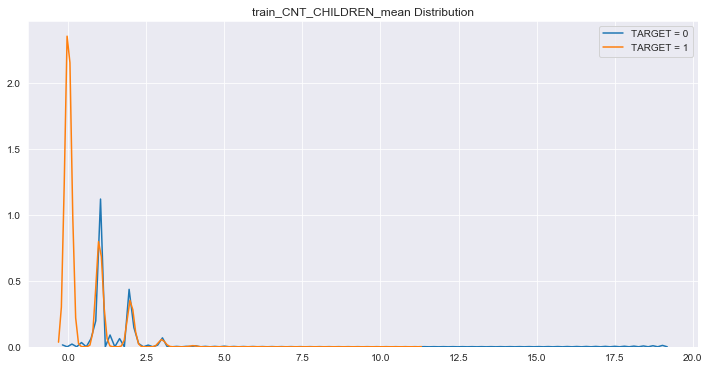

In [413]:
#plor kde 

manage_corr.Kde_target('train_CNT_CHILDREN_mean',df_train_bureau)